# Road Safety and Nightlife Density in San Diego County

# Overview
Using geospatial data, we explore whether the location of popular clubs and bars in San Diego County is related to traffic collisions reported between 2015 and 2019. We define traffic collisions to broadly encompass any traffic violation that is reported and documented in the county's publicly available dataset. Note that these collisions involve events as serious as DUIs to minor breaches such as tailgating related collisions. In addition to analyzing the proximity of traffic collisions to San Diego nightlife, we explore whether car accidents are significantly more likely to occur at certain times of the day (e.g., midnight) or certain days of the week (e.g., Saturdays). Lastly, we explore whether there exist any police biases that lead certain groups of people to be stopped and questioned by the police for significantly longer periods of time. 	 

# Group members
- **Sarah Amiraslani**
    - GitHub ID: SarahAmiraslani
- **Paul Chu**
    - GitHub ID: paulchu54
- **Catherine Eng**
    - GitHub ID: ceeng 
- **Jose Jimenez**
    - GitHub ID: JoseJimenezJr019
- **Erin Park**
    - GitHub ID: eyp012
- **Alysa Quijada**
    - GitHub ID: alysa-quijada

# Research Questions

1. What types of traffic collisions are most common within San Diego county (e.g., DUIs, hit-and-runs, driving on the wrong side of the road, speeding)?


2. Is there a relationship between distance to high bar density areas such as gaslamp quarters, north park, east village, little Italy, pacific beach, hillcrest, and traffic collisions? 


3. Which police beats and geographic divisions within San Diego county attend to the most severe accidents (i.e., those with the highest injuries and fatalities)? 


4. Can we identify any police biases in the demographics of people who are stopped and questioned on the road? 


# Hypothesis

**In response to research question 1**: We predict that minor, non-fatal accidents and crashes will be the most prevalent. We expect that most people are following traffic laws and trying not to get into accidents when driving on a normal day. This would then suggest that most accidents would be minor accidents as people are not deliberately trying to get into big accidents and being conscious. 
Null hypothesis: There is no difference in the prevalence of traffic collision types in San Diego County.</p>
    
**In response to research question 2**: We predict that more collisions will occur in locations where nightlife is common (e.g., Pacific Beach and Gaslamp) rather than the suburbs. Part of most nightlife activities, such as bars and clubs, involves drinking and staying up late through the night. With late nights and alcohol influence, we predict more traffic collisions in those areas. 
Null hypothesis: There is no effect of traffic collisions in relation to high bar density areas. 
    
**In response to research question 3**: We predict that regions with lower-income neighborhoods would have more severe accidents. Low-income neighborhoods may be slower to fix problematic infrastructures, such as damaged roads, causing more collisions. The higher number of collisions also might make police responses slower in these areas. 
Null hypothesis: There is no effect of geographic divisions and police beats in relation to more severe accidents. 
    
**In response to research question 4**: We predict that people of a younger age get stopped and questioned on the road more often. Driving has a lot to do with experience, and those who have been driving longer tend to be better. From this, we expect that those with less experience overall are more likely to be stopped and questioned.
Null hypothesis: There are no biases in the demographics of people who are stopped and questioned on the road. 


# Background

San Diego County is the second-largest population in California, meaning that there is a higher rate of car accidents in San Diego County just by the sheer number of people. In San Diego, more people die from car accidents than being murdered (Bowen, 2017). The rate of car accidents continues to increase while also being reported that these traffic collisions are happening more in low-income neighborhoods. In addition, the leading cause of car accidents in San Diego County is driving under the influence. 

Through this project, we hope to inform the San Diego public about locations and times where collisions most occur to help people make more informed decisions. Specifically, in areas where drunk driving accidents are more prevalent, we want to encourage the use of rideshare apps to promote road safety. By pulling the results directly from data relevant to San Diego, we hope to bring more awareness to residents and responding officer’s patrol beats about the trends we see happening. 

**Note**: To understand our data cleaning steps and analyses, you must understand that police officers are assigned regions of the county to patrol, and these regions are called police beats. San Diego county is divided into 140 Police Beats that make up nine geographic divisions that are referenced in our analyses: Northern, Northeastern, Eastern, Southeastern, Central, Western, Southern, Mid City, and Northwestern San Diego. Below is a map of the beats and geographic divisions in San Diego county. For a better quality image, click the link below the map. 

For more information on San Diego beats see: https://www.sandiego.gov/police/services/divisions

![](map.png)

Image source: https://www.sandiego.gov/sites/default/files/legacy/police/pdf/2011policecitywidemap.pdf

# Datasets

### Traffic collisions dataset

Data from 2015 to 2019, 
- source:https://data.sandiego.gov/datasets/police-collisions/
- Number of observations: 28122

This dataset includes information about reported collisions between the years of 2015 to 2019 in San Diego County. Data contains variables such as  the date and time that the collision occurred, the police beat number corresponding to the location of the accident, the address of the accident, the violation type, a description of the charge, the number of people injured, the number of people killed, and severity level of the offense (e.g., misdemeanor or felony). 

### Police stops dataset

Data from 2018 to 2019
- Source: https://data.sandiego.gov/datasets/police-ripa-stops/
- Number of observations:179725

This dataset includes information on police stops between 2018 and 2019 in San Diego County. Data contains variables such as the date of the stop, the duration of the stop, whether the stop was in response to a call for service, the officer's assignment, the address of the stop, the police beat corresponding to the stop location, the gender, age, and sexual preferences of the person stopped.

### Yelp bars dataset
- Source: Yelp API
    - link: https://drive.google.com/a/ucsd.edu/file/d/11QL6OqdMeBze3QHyMnBN2CFRUKtTPdmt/view?usp=sharing
    - Number of observations: 50
  
This dataset includes Yelp data of bars in San Diego county. The data contain variables such as the name of the bar, the bar's ratings on yelp, the number of ratings the bar has, the URL to the bar's website, and the longitude and latitude coordinates corresponding to its location. 

### Yelp clubs dataset
- Source: Yelp API
    - link:https://drive.google.com/a/ucsd.edu/file/d/1sIjYBX4jSsTmKgmt2BnUeWT1W_xLaxow/view?usp=sharing
    - Number of observations: 49
    
This dataset includes Yelp data of night clubs in San Diego county. The data contain variables such as the name of the club, the club's ratings on yelp, the number of ratings the club has, the URL to the club's website, and the longitude and latitude coordinates corresponding to its location.

We work on each of the datasets independently and did not need to combine datasets into a single dataframe. The yelp datasets allow us to see if any correlation lies within the location of these nightlife locations and vehicle collisions. If so, how high is the traffic collision density around these locations? 

# Setup

In [1]:
#imports 
import re
import datetime

# Fundamental libraries
import numpy as np
import pandas as pd
import json

# For data cleaning
import string

# For geocoding
# from geopy.exc import GeocoderTimedOut, GeocoderQueryError
# from geopy.geocoders import GoogleV3
# import gmaps

# For standard visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For image viewing 
from IPython.display import Image

# For analyses
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import patsy

In [2]:
# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Set seaborn preferences
sns.set(font_scale=1.5, rc={"lines.linewidth":2.5})
sns.set_context('talk')
sns.plotting_context(context='notebook')

# Set matplotlib preferences
font = {'family' : 'Bitstream Vera Sans',
        'weight' : 'regular',
        'size'   : 13}
figure = {'figsize' : (10,8)}

plt.rc('font', **font)
plt.rc('figure', **figure)

# Display plots directly in the notebook instead of in a new window
%matplotlib inline

In [3]:
# Read collisions data
df_collisions = pd.read_csv("datasets/traffic_collisions/pd_collisions_datasd_v1.csv", 
                           dtype = {'report_id':str,'date_time':str,'police_beat':str,
                                    'address_number_primary':str, 'address_pd_primary':str, 
                                    'address_road_primary':str, 'address_sfx_primary':str, 
                                    'address_pd_intersecting':str,'address_name_intersecting':str, 
                                    'address_sfx_intersecting':str,'violation_section':str,
                                    'violation_type':str, 'charge_desc':str, 'injured': int,
                                    'killed':int,'hit_run_lvl':str})
# Read police stops data
df_police_stops = pd.read_csv("datasets/police_stops/ripa_stops_datasd_v1.csv",
                              dtype={'stop_id':int,'ori':str,'agency':str,'exp_years': int, 
                                     'date_stop':str, 'time_stop':str, 'stopduration':int, 
                                     'stop_in_response_to_cfs':int,'officer_assignment_key':int, 
                                     'assignment': str, 'intersection':str,'address_block':str, 
                                     'land_mark':str, 'address_street':str,'highway_exit':str, 
                                     'isschool':int,'school_name':str, 'address_city':str, 
                                     'beat':int,'beat_name':str, 'pid':int, 'isstudent':int,
                                     'perceived_limited_english':int, 'perceived_age':int, 
                                     'perceived_gender':str, 'gender_nonconforming':int, 
                                     'gend':int,'gend_nc':str,'perceived_lgbt':str})
# Read yelp data
yelp_bars = pd.read_csv("datasets/yelp_csv_files/bars_search.csv")
yelp_clubs = pd.read_csv("datasets/yelp_csv_files/clubs_search.csv")

# Data Cleaning

Each of the four datasets our group decided to use required different data processing and cleaning steps. Our data cleaning steps are separated and explained by the dataset below. 

## San Diego traffic collisions data

**Step 1**: Cleaning strings for non-address data

For the San Diego Collision dataset, we first used the ```str.lower()``` function on all columns that contained string data. This was done to make string data look more uniform and presentable. We next used the ```str.strip()``` function to remove extra spaces from strings. This was done because keeping extra spaces could complicate the string concatenation that we planned to do. Moreover, removing extra spaces led the string data to be more uniform across the columns.   

In [4]:
# Make all strings lowercase
df_collisions['severity_level'] = df_collisions['hit_run_lvl'].str.lower()

# Remove extra spaces for easier data processing
df_collisions['violation_section']= df_collisions.violation_section.str.strip()
df_collisions['violation_type'] = df_collisions.violation_type.str.strip()
df_collisions['severity_level'] = df_collisions.severity_level.str.strip()

**Step 2**: Split date and time data 

The original dataset had date and time as data within the same column. However, we were especially interested in these variables and wanted to analyze them separately. So, we split the date and time data into two separate columns using the ```str.split()``` function and indexing. 

In [5]:
# split date_time
date_times = df_collisions['date_time'].str.split(' ', n=1, expand=True)
df_collisions.drop(['date_time'], axis=1,inplace = True)

# Create seperate columns for date and time 
df_collisions['date'] = date_times[0]
df_collisions['time'] = date_times[1]

**Step 3a**: Setting "empty" cell values to true empty stings in columns containing address data 

The original dataset had several columns, which each represented an attribute of the collision address. For example, the address number and street of the collision were independent columns in the original dataset. In order to geocode the addresses into coordinates, the address data had to be in one column as one string, rather than spread over many columns. To begin, the strings were adjusted so that "empty" cells that contained a space instead of an empty cell were made into empty strings using ```set_true_empty_strings```.

In [6]:
def set_true_empty_strings(df):

    # replaces the value zero (in this dataset it means no value) with an empty string
    df['address_number_primary'] = df['address_number_primary'].replace(0, '')

    # replaces empty cells containing a 'space' place holder with an empty string
    df['address_pd_primary'] = df['address_pd_primary'].replace(' ', '')
    df['address_road_primary'] = df['address_road_primary'].replace(' ', '')
    df['address_sfx_primary'] = df['address_sfx_primary'].replace(' ', '')
    df['address_pd_intersecting'] = df['address_pd_intersecting'].replace(' ', '')
    df['address_name_intersecting'] = df['address_name_intersecting'].replace(' ', '')
    df['address_sfx_intersecting'] = df['address_sfx_intersecting'].replace(' ', '')

    return df

In [7]:
df_collisions = set_true_empty_strings(df_collisions)
df_collisions.head()

,report_id,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl,severity_level,date,time
0,170082,935,5500,,VALERIO,TRAIL,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,misdemeanor,2017-01-01,00:01:00
1,170101,322,6400,,CRAWFORD,STREET,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,misdemeanor,2017-01-01,00:01:00
2,170166,124,8300,,CAM DEL ORO,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,misdemeanor,2017-01-01,00:01:00
3,170218,325,8100,,ROYAL GORGE,DRIVE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR,misdemeanor,2017-01-01,00:01:00
4,170097,521,1000,,11TH,AVENUE,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR,misdemeanor,2017-01-01,01:00:00


**Step 3b**: Cleaning the strings in all columns containing address data

The strings of each address column were cleaned through ```lower()``` and ```strip()```, which made all strings lowercase and removed extra whitespace surrounding the strings, respectively.

In [8]:
def address_string_cleaning(df):

    # sets the number column to string from its original int type
    df['address_number_primary'] = df.address_number_primary.astype(str)

    # makes everything lowercase
    df['address_pd_primary'] = df['address_pd_primary'].str.lower()
    df['address_road_primary'] = df['address_road_primary'].str.lower()
    df['address_sfx_primary'] = df['address_sfx_primary'].str.lower()
    df['address_pd_intersecting'] = df['address_pd_intersecting'].str.lower()
    df['address_name_intersecting'] = df['address_name_intersecting'].str.lower()
    df['address_sfx_intersecting'] = df['address_sfx_intersecting'].str.lower()

    # stripping gets rid of extraneous spaces to allow for easier processing of data
    df['address_road_primary'] = df.address_road_primary.str.strip()
    df['address_sfx_primary'] = df.address_sfx_primary.str.strip()
    df['address_pd_intersecting'] = df.address_pd_intersecting.str.strip()
    df['address_name_intersecting'] = df.address_name_intersecting.str.strip()
    df['address_sfx_intersecting'] = df.address_sfx_intersecting.str.strip()

    return df

In [9]:
df_collisions = address_string_cleaning(df_collisions)
df_collisions.head()

,report_id,police_beat,address_number_primary,address_pd_primary,address_road_primary,address_sfx_primary,address_pd_intersecting,address_name_intersecting,address_sfx_intersecting,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl,severity_level,date,time
0,170082,935,5500,,valerio,trail,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,misdemeanor,2017-01-01,00:01:00
1,170101,322,6400,,crawford,street,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,misdemeanor,2017-01-01,00:01:00
2,170166,124,8300,,cam del oro,,,,,MISC-HAZ,VC,MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHI...,0,0,MISDEMEANOR,misdemeanor,2017-01-01,00:01:00
3,170218,325,8100,,royal gorge,drive,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR,misdemeanor,2017-01-01,00:01:00
4,170097,521,1000,,11th,avenue,,,,22107,VC,TURNING MOVEMENTS AND REQUIRED SIGNALS,0,0,MISDEMEANOR,misdemeanor,2017-01-01,01:00:00


**Step 3c**: Creating separate dataframes for types of address

The dataset used contained addresses that landed in three categories: intersections, non intersections, and exceptions. The dataset was divided into three dataframes representing the categories and columns not necessary for geocoding purposes were removed. These dataframes will be the focus of the remainder of step 3. 

In [10]:
df_collisions_intersections = df_collisions[df_collisions.address_name_intersecting != '']
df_collisions_no_intersections = df_collisions[df_collisions.address_number_primary != '']
df_collisions_exceptions = df_collisions[df_collisions.address_name_intersecting == '']
df_collisions_exceptions = df_collisions_exceptions[df_collisions_exceptions.address_number_primary == '']

df_collisions_intersections = df_collisions_intersections[['report_id', 'address_pd_primary',
                                                           'address_road_primary', 'address_sfx_primary',
                                                           'address_pd_intersecting', 'address_name_intersecting',
                                                           'address_sfx_intersecting']]
df_collisions_no_intersections = df_collisions_no_intersections[['report_id', 'address_number_primary',
                                                                 'address_pd_primary', 'address_road_primary',
                                                                 'address_sfx_primary']]
df_collisions_exceptions = df_collisions_exceptions[['report_id', 'address_number_primary', 'address_pd_primary',
                                                     'address_road_primary', 'address_sfx_primary']]

**Step 3d**: Concactanating address data into a single address column

The addresses were then concactanated using a self-made function, ```address_concacter``` which accounted for intersecting address and reformated them properly. Unfortunately, geocoding the addresses that fell in the exceptions category would not be possibly through coding and would have had to be performed manually. These were dropped from the rest of the address, geocoding, and geo plotting analysis. 

In [11]:
def address_concacter(df, intersection):

    df['address'] = list(range(len(df)))

    df = df.reset_index(drop=True)

    for i in range(len(df)):
        if intersection == 'yes':
            df.loc[i, 'address'] = str(df.loc[i, 'address_pd_primary']) + ' ' + \
                                   str(df.loc[i, 'address_road_primary']) + ' ' + \
                                   str(df.loc[i, 'address_sfx_primary']) + ' and ' + \
                                   str(df.loc[i, 'address_pd_intersecting']) + ' ' + \
                                   str(df.loc[i, 'address_name_intersecting']) + ' ' + \
                                   str(df.loc[i, 'address_sfx_intersecting'])
        else:
            df.loc[i, 'address'] = str(df.loc[i, 'address_number_primary']) + ' ' + \
                                   str(df.loc[i, 'address_pd_primary']) + ' ' + \
                                   str(df.loc[i, 'address_road_primary']) + ' ' + \
                                   str(df.loc[i, 'address_sfx_primary'])
    return df

In [12]:
df_collisions_intersections = address_concacter(df_collisions_intersections, 'yes')
df_collisions_no_intersections = address_concacter(df_collisions_no_intersections, 'no')
df_collisions_exceptions = address_concacter(df_collisions_exceptions, 'no')

df_addresses = pd.concat((df_collisions_no_intersections, df_collisions_intersections)).reset_index()
df_addresses = df_addresses[['report_id', 'address']]

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


In [13]:
df_addresses

,report_id,address
0,170082,5500 valerio trail
1,170101,6400 crawford street
2,170166,8300 cam del oro
3,170218,8100 royal gorge drive
4,170097,1000 11th avenue
5,170220,1000 a street
6,170153,2600 ramfos place
7,170035,3900 de la valle
8,170044,9100 sydney court
9,170042,1600 hornblend street


**Step 3e**: Cleaning the single address column to prepare for geocoding

In [14]:
def remove_second_spaces(string):
    return string.replace('  ', ' ')

In [15]:
df_addresses['address'] = df_addresses['address'].apply(remove_second_spaces)

**Step 3f**: Export to csv for safe keeping

The function ```address_concacter``` takes too long to run to have it be used everytime the addresses need to be looked or used. To prevent running the code multiple times the dataframe was exported to a csv file. 

In [16]:
# export to csv
df_addresses.to_csv('geocoding/addresses_cleaned.csv')

**Step 4**: Drop extra columns

Extra columns were dropped. Extra columns included those that held address information, which we had concatenated in step 3 and other columns that we deemed unnecessary to answer our research questions. 

In [17]:
# Drop extra columns
collisions_drop =['address_number_primary','address_road_primary','address_sfx_primary',
                 'address_pd_primary','address_pd_intersecting','address_name_intersecting',
                  'address_sfx_intersecting','charge_desc','report_id','hit_run_lvl']

df_collisions.drop(collisions_drop,axis = 1,inplace = True)

**Step 5**: Find the day of the week that the collision occured

The original dataset provided the date at which collision occurred, but did not specify what day of the week they corresponded to. Given that we are interested in the prevalence of traffic collisions across different days of the week, we needed a way to find a date's corresponding day of the week. To do so, we created a function to extract the year, month, and day from the date column of the original dataset. The year, month, and day were then inputted into the `datetime.datetime()` and `.weekday()` functions to return the corresponding day of the week. The user generated function was then applied to the entire `date` column and the days were saved in a new column named `day`. 

In [18]:
# Find the day of week that collisions occured
def day_week(date):
    
    '''When given a date, this function returns the corresponding day of the week.'''
    
    weekdays= ['monday','tuesday','wednesday','thursday','friday','saturday','sunday']
    
    year=int(date.split('-')[0])
    month=int(date.split('-')[1])
    day = int(date.split('-')[2])
    
    dt=datetime.datetime(year,month,day)
    
    return weekdays[dt.weekday()]   

In [19]:
df_collisions['day']=df_collisions['date'].apply(day_week)

**Step 6**: Group precise times of collisions into hours of the day

The original dataset provided specific times of day at which accidents occurred. These times of day included hours and minutes. To simplify our later analyses,  the times were grouped by hour such that all accidents that occurred between 12:00 AM and 1:00 AM, for example, were labeled as having occurred at 12:00 AM. The function was then applied to the original`time` column. The function was applied directly to the original column rather than saved into a new column because we knew we would not need specific times in our analyses, so we didn't have to keep that data.

In [20]:
def time_day(time):
    
    """When given a specific time (hours,minuites,seconds), this function returns the hour"""
    
    Hours = ['12:00 AM', '1:00 AM','2:00 AM','3:00 AM','4:00 AM','5:00 AM','6:00 AM',
                 '7:00 AM','8:00 AM','9:00 AM','10:00 AM','11:00 AM', '12:00 PM',
                 '1:00 PM', '2:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM',
                 '7:00 PM','8:00 PM','9:00 PM','10:00 PM','11:00 PM']
        
    times = time.split(':')[0]
    times = times.rstrip()
        
    if times == '00':
        hour = Hours[0]
        
    elif times == '01':  
        hour = Hours[1]
        
    elif times == '02':  
        hour = Hours[2]
        
    elif times == '03':
        hour = Hours[3]
    
    elif times == '04':  
        hour = Hours[4]
        
    elif times == '05':
        hour = Hours[5]
        
    elif times == '06':
        hour = Hours[6]
        
    elif times == '07': 
        hour = Hours[7]
        
    elif times == '08':   
        hour = Hours[8]
        
    elif times == '09':
        hour = Hours[9]
        
    elif times == '10': 
        hour = Hours[10]
        
    elif times == '11':
        hour = Hours[11]
        
    elif times == '12':
        hour = Hours[12]
        
    elif times == '13': 
        hour = Hours[13]
        
    elif times == '14':
        hour = Hours[14]
        
    elif times == '15':
        hour = Hours[15]
        
    elif times == '16': 
        hour = Hours[16]
        
    elif times == '17':
        hour = Hours[17]
        
    elif times == '18':
        hour = Hours[18]
        
    elif times == '19': 
        hour = Hours[19]
        
    elif times == '20':
        hour = Hours[20]
        
    elif times == '21':
        hour = Hours[21]
        
    elif times == '22': 
        hour = Hours[22]
        
    elif times == '23':
        hour = Hours[23]
        
    elif times == '24':
        hour = Hours[24]
        
    else: 
        hour = np.nan
            
    return hour

In [21]:
df_collisions['time']=df_collisions['time'].apply(time_day)

**Step 7**: Translate legal violation section codes into a simple descriptor of the offense. 

The original dataset provided violation section codes, which represent a very specific violation of the law. We decided to go through all the unique violations and group them into general descriptors to make our analyses simpler. We created 20 groups to represent the 219 unique violations that were present in our dataset. 

The groups included: evading the police, driving without a licence, breaking bicycle laws, breaking motorized scooter laws, failing pedestrian duties, overtaking and passing other vehicles, not following the right of way, speeding, driving under the influence, driving a car that is unsafe to be on the road, hit and runs, tailgating, driving on the wrong side of the road, disobeying traffic signs, disobeying traffic laws, auto theft, abandoning a vehicle, reckless driving, phone use while driving, and 'other'. The 'other' category included particular cases we felt did not fit any of the groups and also included cases where the police were unsure which violation section to indicate. 

The website used to translate codes: https://leginfo.legislature.ca.gov/faces/home.xhtml

In [22]:
# Translate violation sections

def viol_section(code): 
    
    
    evading_police = ['2800.4','2800.1(A)','2800.2(A)','2800']
    
    driving_wout_liscence = ['12500(A)','12500B','14601.1(A)','14601.2(A)',
                             '14601(A)','12500','14603','14607','12500(A)',
                             '12500B','14601.1(A)','14601.2(A)','14601(A)']

    overtaking_passing = ['21750','21751','21754','21755','21760','21712B',
                          '21752A', '21752D','21755(A)','21760(C)','21651B','21658A']

    drivers_fail_right_o_way= ['21804','21800(D)','21800(D)(1)', '21800(D)1',
                               '21800A','21800B', '21800C','21801A', '21801B', 
                               '21802A', '21802B','21803A', '21806A', '21809(A)',
                               '21950A','21950B','21453A','21453C']
    
    speeding = ['22349', '22350', '22352', '22356','23109(A)','23109(C)','22348A',
                '22349(A)','22400A']

    dui = ['21221.5','23152(E)','23152(F)','23152(G)','23152A','23152B','23152C',
           '23153(A)','23153(F)']

    vehicle_unsafe = ['24002','24250','26450','26451','26453','35250','38355',
                     '26451A','26454A','26708A','2803(A)','29003B','23114(A)']

    hit_n_run = ['20001(A)','20001(B)(1)','20002(A)','20002(A)(1)','20002(A)(2)',
                 '20002(B)']
    
    tailgating = ['21703','21703A']
    
    wrong_side_road = ['21650','21650.1','21652','21656','21657','21660','21663',
                       '21651(C)','21651A','21655B']
    
    fail_traffic_signs = ['21100.3','21462','22450','22100.5','22102','22103',
                          '22105','22106','22107','22108','22109','21367(A)',
                          '21367(B)','21367C','21451A','38300','38314','21453B',
                          '22450(A)','22450(B)','22451A','22451B','21461A','21460A',
                          '21457A','21651(A)(2)','22101D']

    fail_traffic_laws = ['21451B','21458(A)(1)','21460.5C','21460(C)','21460B','22100A',
                         '22100B','22500A','22500H','22502A','22515A','22515B','22526A',
                         '22651B','21651(A)1']
    
    reckless_driving = ['23103','23104']
    
    phone_use = ['23123.5(A)','23123(A)','23124(A)']
    
    
    if code in evading_police: 
        new_code = 'evading police'
    
    elif code in driving_wout_liscence: 
        new_code = 'driving without a liscence'
    
    elif code in overtaking_passing: 
        new_code = 'overtaking and passing'
        
    elif code in drivers_fail_right_o_way: 
        new_code = 'right of way'
        
    elif code in speeding: 
        new_code = 'speeding'
    
    elif code in dui:
        new_code = 'DUI' 
    
    elif code in vehicle_unsafe: 
        new_code = 'unsafe vehicle'
        
    elif code in hit_n_run: 
        new_code = 'hit and run'
        
    elif code in tailgating: 
        new_code = 'tailgating'
    
    elif code in wrong_side_road: 
        new_code = 'wrong side of the road'
        
    elif code in fail_traffic_signs: 
        new_code = 'violate traffic signals/signs'
        
    elif code in fail_traffic_laws: 
        new_code = 'violate traffic laws'
        
    elif code in reckless_driving:
        new_code = 'reckless driving'
    
    else: 
        new_code = 'other'
    
    return new_code

In [23]:
df_collisions['violation_section']=df_collisions['violation_section'].apply(viol_section)

**Step 8:** Group police beats into geographic subdivisions. 

The original dataset included the police beat in which each collision occurred. However, because there are 140 police beats in San Diego county, we chose to run analyses on the nine geographic subdivisions rather than the police beats. Thus, we needed a way to transform the beats data into the corresponding geographic region. This was done with a user-defined function, which was then applied to the `police_beat` column to create a new column named `Geographic_region`. 

In [24]:
def regions(beat):
    
    northern = ['126','115','114','113','124','122','111','112','116','121','123']
    
    northwestern = ['902','904','999','908','937','936','935','933','934','931','932']
    
    northeastern = ['212','235','234','232','223','231','246','245','241','243','242',
                    '233']
    
    western = ['600','617','616','615','618','613','614','612','611','625','626','628',
               '627','624','623','622','621']
    
    midcity = ['800','813','812','837','835','836','834','839','838','811','814','825',
               '824','832','831','833','836','827','826','828','827','829','822','821',
               '841','823']
    
    southeastern= ['419','451','447','445','444','441','442','443','446','432','431',
                   '451','435','433','452','437','438','436','434','439']
    
    southern = ['760','721','724','722','723','725','713','714','712','711','712']
    
    central = ['527','528','524','522','525','523','541','521','526','529','531',
               '517','518','516','512','511','515','514','509']
   
    eastern = ['380','313','311','312','314','315','316','321','322','325',
               '324','323','326','327']
    
    if beat in northern: 
        region = 'Northern'
    
    elif beat in northwestern: 
        region = 'Northwestern'
   
    elif beat in northeastern: 
        region = 'Northeastern'
    
    elif beat in western: 
        region = 'Western'
        
    elif beat in midcity: 
        region = 'Mid City'
        
    elif beat in southeastern: 
        region = 'Southeastern'
    
    elif beat in southern: 
        region = 'Southern'
        
    elif beat in central: 
        region = 'Central'
    
    elif beat in eastern: 
        
        region = 'Eastern'
        
    else: 
        region = np.nan
        
    return region

In [25]:
df_collisions['Geographic_region']=df_collisions['police_beat'].apply(regions)

**Step 9**: Reorder columns

Lastly, columns were reordered in a way that was more logical and facilitated analyzing the data.

In [26]:
# Reorder columns 
df_collisions = df_collisions[['date','time','day','police_beat','Geographic_region','violation_section','violation_type','severity_level','injured','killed']]

**Step 10**: Create seperate columns for the frequency of our violations of interest

Given that we are especially interested in how nightlife density relates to DUI, speeding, driving on the wrong side of the road, and hit and run related accidents, we needed to create separate columns for each to be used in later analyses and visualization. This was done using the for loop below. 

In [27]:
df_collisions['dui']=np.nan
df_collisions['speeding']=np.nan
df_collisions['wrong_side']=np.nan
df_collisions['hit_run']=np.nan

for col,row in df_collisions.iterrows(): 
    
    if df_collisions.loc[col, 'violation_section'] == 'DUI':
        df_collisions.loc[col,'speeding'] = 1
        df_collisions.loc[col,'dui'] = 0
        df_collisions.loc[col,'wrong_side'] = 0
        df_collisions.loc[col,'hit_run'] = 0
    
    elif df_collisions.loc[col, 'violation_section'] == 'speeding':
        df_collisions.loc[col,'dui'] = 1
        df_collisions.loc[col,'wrong_side'] = 0
        df_collisions.loc[col,'hit_run'] = 0
        df_collisions.loc[col,'speeding'] = 0
        
    elif df_collisions.loc[col, 'violation_section'] == 'wrong side of the road':
        df_collisions.loc[col,'wrong_side'] = 1
        df_collisions.loc[col,'dui'] = 0
        df_collisions.loc[col,'hit_run'] = 0
        df_collisions.loc[col,'speeding'] = 0
        
    elif df_collisions.loc[col, 'violation_section'] == 'hit and run':
        df_collisions.loc[col,'hit_run'] = 1
        df_collisions.loc[col,'wrong_side'] = 0
        df_collisions.loc[col,'dui'] = 0
        df_collisions.loc[col,'speeding'] = 0
        
    else: 
        df_collisions.loc[col,'speeding'] = 0
        df_collisions.loc[col,'dui'] = 0
        df_collisions.loc[col,'wrong_side'] = 0
        df_collisions.loc[col,'hit_run'] = 0

The resulting, clean, dataframe:

In [28]:
df_collisions.head(5)

,date,time,day,police_beat,Geographic_region,violation_section,violation_type,severity_level,injured,killed,dui,speeding,wrong_side,hit_run
0,2017-01-01,12:00 AM,sunday,935,Northwestern,other,VC,misdemeanor,0,0,0.0,0.0,0.0,0.0
1,2017-01-01,12:00 AM,sunday,322,Eastern,other,VC,misdemeanor,0,0,0.0,0.0,0.0,0.0
2,2017-01-01,12:00 AM,sunday,124,Northern,other,VC,misdemeanor,0,0,0.0,0.0,0.0,0.0
3,2017-01-01,12:00 AM,sunday,325,Eastern,violate traffic signals/signs,VC,misdemeanor,0,0,0.0,0.0,0.0,0.0
4,2017-01-01,1:00 AM,sunday,521,Central,violate traffic signals/signs,VC,misdemeanor,0,0,0.0,0.0,0.0,0.0


### San Diego police stops data

**Step 1**: Rename columns

The columns were renamed to make them more readable and declutter the data frame. 

In [29]:
# Rename columns
df_police_stops.rename(columns={'perceived_age':'age','perceived_gender':'gender','highway_loc':'highway'},inplace=True)

**Step 2**: Drop columns and entries

Columns that were not needed for analyses were dropped. In an effort to follow the Safe Harbour Method, the data of all people over the age of 90 were dropped from the dataset. 

In [30]:
# Drop useless columns
drop_cols_stops = ['pid','land_mark','officer_assignment_key','isstudent',
                   'gend_nc','agency','stop_id', 'gend','exp_years','ori',
                   'isschool','school_name','gender_nonconforming','perceived_lgbt',
                   'perceived_limited_english','assignment']

df_police_stops.drop(drop_cols_stops, axis = 1,inplace=True)

In [31]:
#removes all people over the age of 90 
df_police_stops=df_police_stops.loc[df_police_stops["age"]<=90]

#checks that the max age is 90
assert df_police_stops["age"].max() == 90

**Step 3**: Replace integers with categorical descriptors

The original dataset represented values of yes with a 1 and values of no with a 0. We found this hard to interpret and thus changed the values to be strings of 'yes' or 'no,' respectively. This was done only for the `stop_in_response_to_cfs` variable, as this was the only column of this type that we hadn't dropped.  

In [32]:
# Replace integers with categorical descriptors 
df_police_stops['stop_in_response_to_cfs'] = df_police_stops['stop_in_response_to_cfs'].replace(0,'no')
df_police_stops['stop_in_response_to_cfs'] = df_police_stops['stop_in_response_to_cfs'].replace(1,'yes')

In [33]:
df_police_stops

,date_stop,time_stop,stopduration,stop_in_response_to_cfs,intersection,address_block,address_street,highway_exit,address_city,beat,beat_name,age,gender
0,2018-07-01,00:01:37,30,no,NaN,700,Grand Avenue,NaN,SAN DIEGO,122,Pacific Beach 122,25,Male
1,2018-07-01,00:03:34,10,no,I-5,NaN,NOBEL DRIVE,NaN,SAN DIEGO,121,Mission Beach 121,25,Male
2,2018-07-01,00:05:43,15,yes,NaN,4400,59th Street,NaN,SAN DIEGO,822,El Cerrito 822,30,Male
3,2018-07-01,00:05:43,15,yes,NaN,4400,59th Street,NaN,SAN DIEGO,822,El Cerrito 822,30,Female
4,2018-07-01,00:19:06,5,no,NaN,4800,NIAGARA AVE,NaN,SAN DIEGO,614,Ocean Beach 614,23,Male
5,2018-07-01,00:03:00,15,yes,NaN,4500,la jolla village dr,NaN,SAN DIEGO,115,University City 115,25,Male
6,2018-07-01,00:24:02,20,no,NaN,800,Thomas,NaN,SAN DIEGO,122,Pacific Beach 122,22,Male
7,2018-07-01,00:31:19,120,no,NaN,4800,LOGAN AVENUE,NaN,SAN DIEGO,446,Lincoln Park 446,37,Male
8,2018-07-01,00:33:19,3,no,NaN,4100,estrella,NaN,SAN DIEGO,826,Colina Del Sol 826,30,Male
9,2018-07-01,00:11:00,20,yes,NaN,1100,hornblend st,NaN,SAN DIEGO,122,Pacific Beach 122,28,Male


**Step 4:** Create a single column to hold addresses

The original dataset had several columns, which each represented an attribute of the police stop. For example, the address number and street of the stop were independent columns in the original dataset. Thus, string concatenation was performed to simplify the dataset and avoid having extra columns. Specifically, variables ```address_block``` (e.g., 700) , ```address_street``` (e.g., Grand Avenue), and ```address_city``` (e.g., San Diego) were concatenated so the resulting column contained a single string (e.g., 700 Grand Avenue San Diego).  

In [34]:
# Concatenate primary adress data into a single column
df_police_stops['address']= df_police_stops.address_block + ' ' + df_police_stops.address_street + ' '+ df_police_stops.address_city
df_police_stops.drop(['address_block','address_street','address_city'],axis = 1,inplace=True)
df_police_stops.head()

# Concatenate highway address in a single column
# replace np.nan values with an empty string
df_police_stops['intersection'] = df_police_stops['intersection'].replace(np.nan, '', regex=True)
df_police_stops['highway_exit'] = df_police_stops['highway_exit'].replace(np.nan, '', regex=True)

# Concatenate highway adresses
df_police_stops['highway']=df_police_stops.intersection + ' ' + df_police_stops.highway_exit
df_police_stops.drop(['intersection','highway_exit'],axis = 1,inplace=True)

In [35]:
df_police_stops

,date_stop,time_stop,stopduration,stop_in_response_to_cfs,beat,beat_name,age,gender,address,highway
0,2018-07-01,00:01:37,30,no,122,Pacific Beach 122,25,Male,700 Grand Avenue SAN DIEGO,
1,2018-07-01,00:03:34,10,no,121,Mission Beach 121,25,Male,NaN,I-5
2,2018-07-01,00:05:43,15,yes,822,El Cerrito 822,30,Male,4400 59th Street SAN DIEGO,
3,2018-07-01,00:05:43,15,yes,822,El Cerrito 822,30,Female,4400 59th Street SAN DIEGO,
4,2018-07-01,00:19:06,5,no,614,Ocean Beach 614,23,Male,4800 NIAGARA AVE SAN DIEGO,
5,2018-07-01,00:03:00,15,yes,115,University City 115,25,Male,4500 la jolla village dr SAN DIEGO,
6,2018-07-01,00:24:02,20,no,122,Pacific Beach 122,22,Male,800 Thomas SAN DIEGO,
7,2018-07-01,00:31:19,120,no,446,Lincoln Park 446,37,Male,4800 LOGAN AVENUE SAN DIEGO,
8,2018-07-01,00:33:19,3,no,826,Colina Del Sol 826,30,Male,4100 estrella SAN DIEGO,
9,2018-07-01,00:11:00,20,yes,122,Pacific Beach 122,28,Male,1100 hornblend st SAN DIEGO,


**Step 5**: Define a function to split beat_name and beat_number. 

The original dataset had two columns related to police beats. The first column contained only the police beat number (e.g., 122), and the second contained both the police beat number and the corresponding name (e.g., Pacific Beach 122). Given that we already had a column with the police beat number, we wanted to remove the redundant police beat number from the second column. This allowed us to create cleaner visualizations and run analyses more easily.The redundant police beat number was removed by creating a function that employed regular expressions to identify instances that that were not digits. The function then returned a string with the corresponding name of the police beat and no police beat number. 

In [36]:
def extract_string(s):
    x=re.findall("\D",s)
    return ''.join(x)

In [37]:
df_police_stops['beat_name']=df_police_stops['beat_name'].apply(extract_string)

**Step 6**: Apply the `day_week` user defined function

The function `day_week`, which was defined while cleaning the `df_collisions` data, was applied to find the days of the week for each police stop. The days were saved into a new column named `day` and the original column `date_stop` was removed as we would not use specific dates in analyses. 

In [38]:
df_police_stops['day']=df_police_stops['date_stop'].apply(day_week)
df_police_stops.drop(['date_stop'], axis=1,inplace = True)

**Step 7**: Apply the `time_day` user defined function

The function `time_day`, which was defined while cleaning the `df_collisions` data, was applied to group the police stop times into their respective hours. This was done as it would be challenging to run analyses on precise times of police stops as it is likely that this would lead to unequal group sizes and too many groups to run interpretable analyses. 

In [39]:
df_police_stops['time']=df_police_stops['time_stop'].apply(time_day)

**Step 8**: Cleaning string data

We used the `str.lower()` function on all columns that contained string data. This was done to make string data look more uniform and presentable. We next used the `str.strip()` function to remove extra spaces from strings. This was done to be consistent with previous data cleaning methods. Because a lot of police stops do not happen on the highway, the `highway` column did not have many entries and instead had several rows where there were empty entries. Thus, we used the `replace()` function and regular expressions to replace all empty rows of the `highway` variable with `np.nan` values. 

In [40]:
df_police_stops['address']=df_police_stops['address'].str.lower()
df_police_stops['beat_name']=df_police_stops['beat_name'].str.lower()

df_police_stops['address']=df_police_stops['address'].str.strip()
df_police_stops['beat_name']=df_police_stops['beat_name'].str.strip()

In [41]:
# replace empty string values with np.nan to faciliate data analysis
df_police_stops['highway'] = df_police_stops['highway'].replace(r'^\s*$', np.nan, regex=True)

**Step 9**: Reorder columns

Lastly, columns were reordered in a way that was more logical and facilitated analyzing the data.

In [42]:
df_police_stops = df_police_stops[['day','time','stopduration','beat','beat_name','age','gender','address','highway']]

Display the, now clean, dataset:

In [43]:
df_police_stops.head(5)

,day,time,stopduration,beat,beat_name,age,gender,address,highway
0,sunday,12:00 AM,30,122,pacific beach,25,Male,700 grand avenue san diego,NaN
1,sunday,12:00 AM,10,121,mission beach,25,Male,NaN,I-5
2,sunday,12:00 AM,15,822,el cerrito,30,Male,4400 59th street san diego,NaN
3,sunday,12:00 AM,15,822,el cerrito,30,Female,4400 59th street san diego,NaN
4,sunday,12:00 AM,5,614,ocean beach,23,Male,4800 niagara ave san diego,NaN


### Yelp data

**Step 1**: Removing excess characters from coordinates 

The yelp data came in pretty clean to begin with. The only real problem that arose was the format of the coordinates in the csv file. In order to make this data more readily usable we began by removing punctuation and characters unnecassary for processing using the function ```remove_punctuation```. 

In [44]:
def remove_punctuation_df(df, list_of_columns):
    for column in list_of_columns:
        for i in range(len(df)):
            temp_string = df.loc[i, column]
            clean_string = temp_string.translate(str.maketrans("","", '{}\':'))
            df.loc[i, column] = clean_string
    return df

In [45]:
yelp_bars = remove_punctuation_df(yelp_bars, ['coordinates'])
yelp_clubs = remove_punctuation_df(yelp_clubs, ['coordinates'])

**Step 2**: Getting the coordinates

The coordinates were then retrieved by the function ```get_coordinates_from_string``` which pulls out the coordinates as float values and removes the excess information not necessary for analysis (the strings ```'latitude'``` and ```'longitude'```). 

In [46]:
def get_coordinates_from_string(df):
    list_lat, list_long = [], []
    for i in range(len(df)):
        coordinate_string = df.loc[i, 'coordinates']
        coordinate_string = coordinate_string.replace('latitude', '').replace('longitude', '').strip()
        lat, long = coordinate_string.split(',')
        list_lat.append(float(lat)), list_long.append(float(long))
    return list_lat, list_long

In [47]:
bar_lats, bar_longs = get_coordinates_from_string(yelp_bars)
club_lats, club_longs = get_coordinates_from_string(yelp_clubs)

**Step 3**: Add the new data to the dataframe

The new longitude and latitude values are now added to the dataframe under columns respectively named. 

In [48]:
yelp_bars['latitude'] = bar_lats
yelp_bars['longitude'] = bar_longs
yelp_clubs['latitude'] = club_lats
yelp_clubs['longitude'] = club_longs

**Step 4**: Remove unnecessary columns 

The columns ```url``` and ```Unnamed: 0``` were found to not be useful for the processing of this data and were therefore dropped from the dataframe. The ```coordinates``` column was also dropped as the data is not represented in the new ```latitude``` and ```longitude``` columns. 

In [49]:
yelp_bars.drop(['Unnamed: 0', 'url', 'coordinates'],axis=1, inplace=True)
yelp_clubs.drop(['Unnamed: 0', 'url', 'coordinates'],axis=1, inplace=True)

In [50]:
yelp_bars.head()

,name,rating,review_count,location,latitude,longitude
0,Thursday Club,5.0,72,"{'address1': '1224 Santa Barbara St', 'address...",32.73,-117.25
1,Forbidden Cove,4.0,8,"{'address1': '7576 Clairemont Mesa Blvd', 'add...",32.83,-117.16
2,ALTITUDE Sky Lounge,4.0,1445,{'address1': 'Marriott San Diego Gaslamp Quart...,32.71,-117.16
3,Noble Experiment,4.5,1496,"{'address1': '777 G St', 'address2': '', 'addr...",32.71,-117.16
4,Village Walk Assn,5.0,1,"{'address1': '1501 India St', 'address2': '', ...",32.72,-117.17


In [51]:
yelp_clubs.head()

,name,rating,review_count,location,latitude,longitude
0,San Diego Club Crawl,4.5,303,"{'address1': '', 'address2': None, 'address3':...",32.71,-117.16
1,Parq Nightclub,3.5,617,"{'address1': '615 Broadway', 'address2': None,...",32.72,-117.16
2,FLUXX,3.0,888,"{'address1': '500 4th Ave', 'address2': '', 'a...",32.71,-117.16
3,OMNIA Nightclub,3.0,734,"{'address1': '454 6th Ave', 'address2': '', 'a...",32.71,-117.16
4,ALTITUDE Sky Lounge,4.0,1445,{'address1': 'Marriott San Diego Gaslamp Quart...,32.71,-117.16


# Geocoding 

### San Diego traffic collisions address geocoding 

**Step 1**: Setting up the Google Maps Client 

For geocoding, the package geopy was used as it streamlined reading the json file retrieved from a Google Maps Geocoding API query. The API requires an API key which only permits 40,000 free queries per month before charging per 1000 queries. In order to prevent the API key owner from being charged, the code in this section was only ran once and the API key was hosted on the owner's desktop so it could never be run accidentally by anyone but them. Therefore, the code in this section will not be executable from anywhere but their desktop so it is commented out to prevent the notebook from running to completion. 

In [52]:
# create a client for geopy through Google, only ran once. This code will not function if ran as the api key only exists locally
# key = open("desktop/google_api_key.txt")
# geopy_client = GoogleV3(key.read())

**Step 2**: Adding city to addresses 

To prevent any confusion about addresses being geocoded, the city was added to the end of the string by applying ```add_city``` to the address column. 

In [53]:
# Add city to addresses
# def add_city(df):
#     i = 0
#     for address in df['address']:
#         address = address.strip().lower()
#         df.loc[i, 'address'] = address + ', san diego, ca'
#         i += 1
#     return df

In [54]:
# df_addresses = add_city(df_addresses)

**Step 3**: Batch breakdown for geocoding 

To prevent timeout errors from the Google Maps API, batches of size 3000 were created from the database 

In [55]:
# break the dataframes into batches to prevent timeout
# df_addresses_1 = df_addresses.loc[0:3000]
# df_addresses_2 = df_addresses.loc[3001:6000]
# df_addresses_3 = df_addresses.loc[6001:9000]
# df_addresses_4 = df_addresses.loc[9001:12000]
# df_addresses_5 = df_addresses.loc[12001:15000]
# df_addresses_6 = df_addresses.loc[15001:18000]
# df_addresses_7 = df_addresses.loc[18001:21000]
# df_addresses_8 = df_addresses.loc[21001:24000]
# df_addresses_9 = df_addresses.loc[24001:27000]
# df_addresses_10 = df_addresses.loc[27001:]

**Step 4**: Geocoding the batches 

A custom function named ```get_coordinates``` was made to geocode the entire datasets' addresses into coordinates. Nearly 30, 000 addresses were geocoded into coordinates. Due to the sheer size of this dataset, this code was only ran once. The batches were concacted and the data saved to a csv file for future use. 

In [56]:
# loop to geocode addresses
# def get_coordinates(address):
#     # call geocode to get location information
#     try:
#         geocode = geopy_client.geocode(address)
#     except GeocoderTimedOut:
#         geocode = None
#     except GeocoderQueryError:
#         geocode = None
# 
#     # get coordinates
#     try:
#         coords = [geocode.latitude, geocode.longitude]
#     except:
#         coords = None
# 
#     return coords

In [57]:
# df_addresses_1['coordinates'] = df_addresses_1['address'].apply(get_coordinates)
# df_addresses_2['coordinates'] = df_addresses_2['address'].apply(get_coordinates)
# df_addresses_3['coordinates'] = df_addresses_3['address'].apply(get_coordinates)
# df_addresses_4['coordinates'] = df_addresses_4['address'].apply(get_coordinates)
# df_addresses_5['coordinates'] = df_addresses_5['address'].apply(get_coordinates)
# df_addresses_6['coordinates'] = df_addresses_6['address'].apply(get_coordinates)
# df_addresses_7['coordinates'] = df_addresses_7['address'].apply(get_coordinates)
# df_addresses_8['coordinates'] = df_addresses_8['address'].apply(get_coordinates)
# df_addresses_9['coordinates'] = df_addresses_9['address'].apply(get_coordinates)
# df_addresses_10['coordinates'] = df_addresses_10['address'].apply(get_coordinates)

# df_addresses_complete = pd.concat([df_addresses_1, df_addresses_2, df_addresses_3, df_addresses_4, df_addresses_5,
#                                    df_addresses_6, df_addresses_7, df_addresses_8, df_addresses_9])

# df_addresses.to_csv('addresses_complete.csv')

### Geo plotting data processing 

**Step 1**: Splitting coordinates 

In order to plot the vehicle collisions, the coordinates need to be split into separate lists for latitude and longitude. Using ```split_coordinates``` we created two lists and added them to the existing dataframe. This was saved to another csv file for future use. 

In [58]:
def split_coordinates(df):

    i = 0
    lat = list(range(len(df)))
    long = list(range(len(df)))
    error_list = list()
    i = 0
    for coordinate in df['coordinates']:
        try:
            lat_i, long_i = coordinate.split(',')
            lat[i] = float(lat_i.replace('[', '').replace(']', '').strip())
            long[i] = float(long_i.replace('[', '').replace(']', '').strip())
        except AttributeError:
            lat[i] = None
            long[i] = None
            error_list.append([coordinate, i])
        i += 1
    return lat, long, error_list

In [59]:
try: 
    df_complete = pd.read_csv('geocoding/addresses_complete.csv', dtype={'coordinates': str})
    df_complete['latitude'], df_complete['longitude'], errors = split_coordinates(df_complete)
    df_complete.to_csv('geocoding/addresses_with_lat_long.csv')
except: 
    df_address_complete['latitude'], df_address_complete['longitude'], errors = split_coordinates(df_addresses_complete)
    df_address_complete.to_csv('geocoding_setup/addresses_with_lat_long.csv')

**Step 2**: Removing incompatible coordinates 

Unfortunately, not all the coordinates returned from the geocoding were correct and with the limitation of being able to only run the loop once, 35 datapoints had to be excluded from the geo visualization. These are located within the errors variable. 

In [60]:
try: 
    df_in_sd = df_complete.loc[(df_complete['latitude'] <= 33) & (df_complete['latitude'] >= 32.54)].reset_index()
    df_in_sd = df_in_sd.loc[(df_complete['longitude'] <= -116.86) & (df_in_sd['longitude'] >= -117.3)].reset_index()
except: 
    df_complete = pd.read_csv('addresses_with_lat_long.csv',
                          dtype={'coordinates': str}).drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
    df_in_sd = df_complete.loc[(df_complete['latitude'] <= 33) & (df_complete['latitude'] >= 32.54)].reset_index()
    df_in_sd = df_in_sd.loc[(df_complete['longitude'] <= -116.86) & (df_in_sd['longitude'] >= -117.3)].reset_index()

**Step 3**: Initialize Google Maps Plotting client 

Create an instance of the ```gmaps``` client using the api key from the geocoding client. This will also be commented out as it can only be run on the api key owner's local desktop. The figure layout is also defined here. 

In [61]:
# gmaps.configure(key.read())

# figure_layout = {
#     'width': '1000px',
#     'height': '1000px',
#     'border': '1px solid black',
#     'padding': '1px'
# }

# Data Visualization

## 1. DUI Related Accident Prevalence by Geographic Region

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Bitstream Vera Sans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


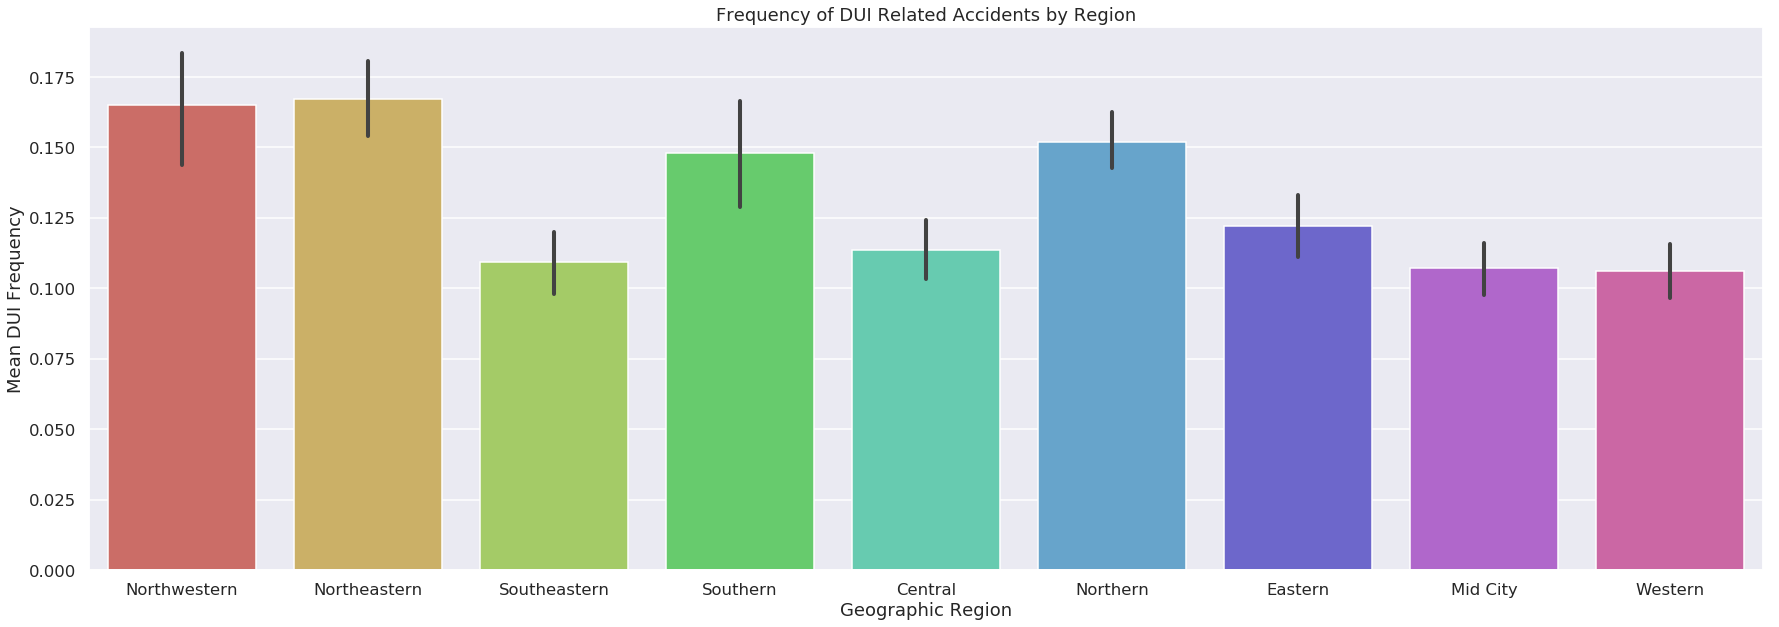

In [62]:
plt.figure(figsize=(30,10))

sns.barplot(x='Geographic_region',y='dui',data=df_collisions,palette="hls",order=['Northwestern','Northeastern','Southeastern',
                                                                             'Southern','Central','Northern','Eastern','Mid City','Western'])

plt.title('Frequency of DUI Related Accidents by Region');
plt.xlabel('Geographic Region');
plt.ylabel('Mean DUI Frequency');

This bar chart displays the mean number of DUI related accidents by geographic region of San Diego county. It appears that the Northeastern region has the highest number of DUI related accidents, while the Southeastern region has the least number of DUI related accidents. In general, there does not seem to be a great difference in the number of DUI related accidents among the Southeastern, Central, Eastern, Mid City, and Western regions. 

## 2. Hit and Run Related Accident Prevalence by Geographic Region

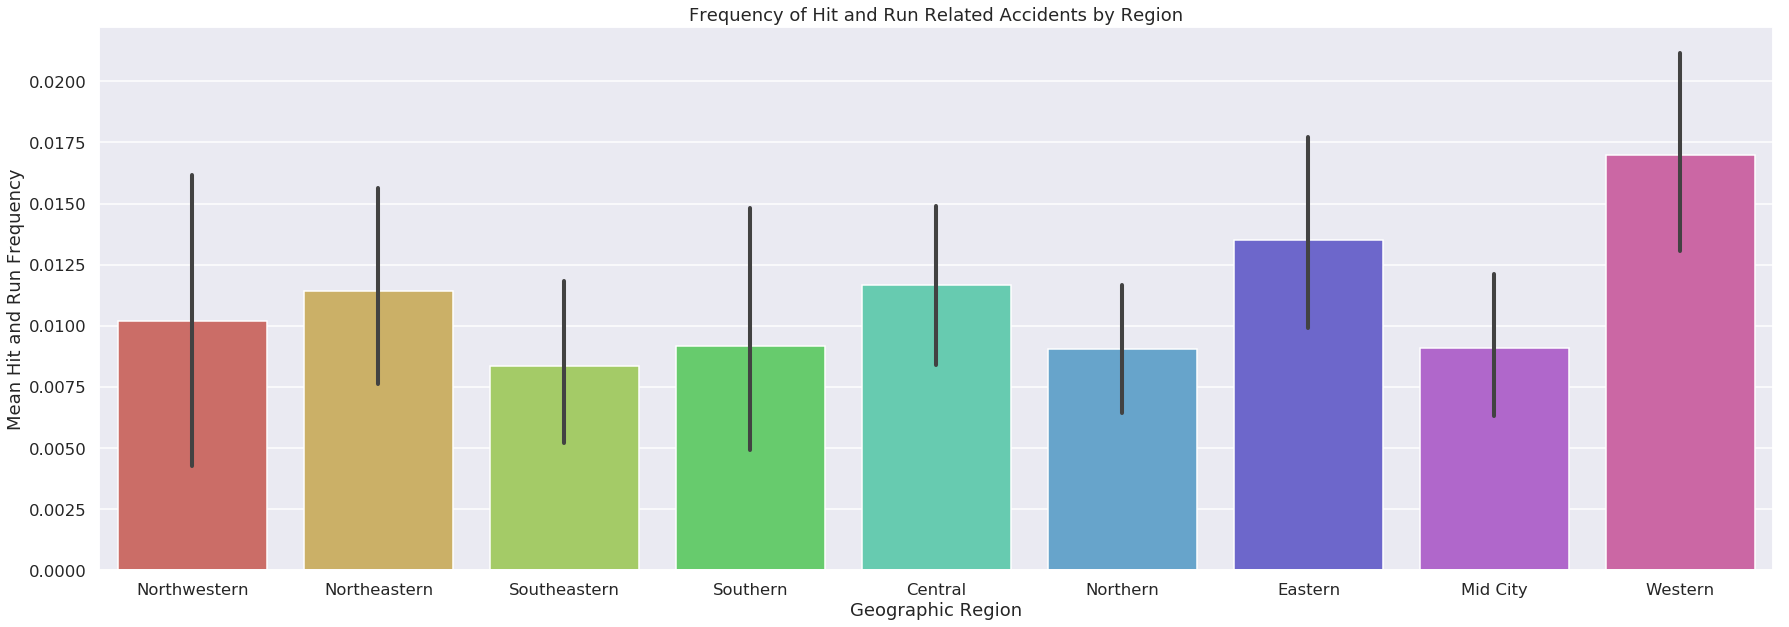

In [63]:
plt.figure(figsize=(30,10))

sns.barplot(x='Geographic_region',y='hit_run',data=df_collisions,palette="hls",order=['Northwestern','Northeastern','Southeastern',
                                                                               'Southern','Central','Northern','Eastern','Mid City','Western'])

plt.title('Frequency of Hit and Run Related Accidents by Region');
plt.xlabel('Geographic Region');
plt.ylabel('Mean Hit and Run Frequency');

This bar chart displays the mean number of hit and run related accidents by geographic region of San Diego county. It appears that the Western region has the highest number of hit and run related accidents, while the Southeastern region has the lowest number of hit and run related accidents. In general, there does not seem to be a great difference in the number of hit and run related accidents between the Northwestern, Northeastern, Central, and Eastern regions. 

## 2. Speeding Related Accident Prevalence by Geographic Region

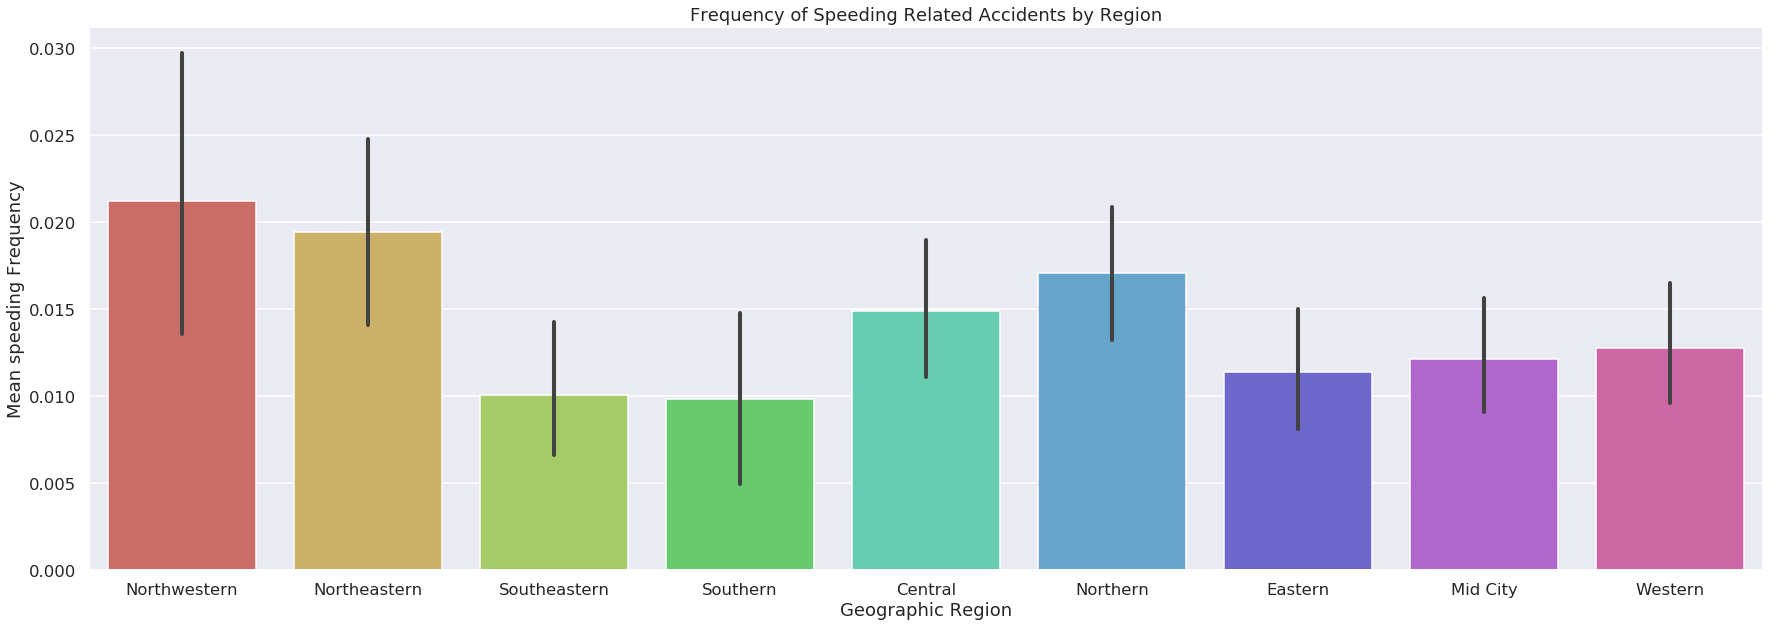

In [64]:
plt.figure(figsize=(30,10))

sns.barplot(x='Geographic_region',y='speeding',data=df_collisions,palette="hls",order=['Northwestern','Northeastern','Southeastern',
                                                                                    'Southern','Central','Northern','Eastern','Mid City','Western'])

plt.title('Frequency of Speeding Related Accidents by Region');
plt.xlabel('Geographic Region');
plt.ylabel('Mean speeding Frequency');

This bar chart displays the mean number of speeding-related accidents by geographic region of San Diego county. It appears that the Northwestern region has the highest number of speeding-related accidents, while the Southern region has the lowest number of speeding-related accidents. In general, there doesn't seem to be a great difference in the number of speeding-related accidents between Southeastern, Southern, Eastern, Mid City, and Western regions. 

## 3. Driving on the Wrong Side of the Road Related Accident Prevalence by Geographic Region

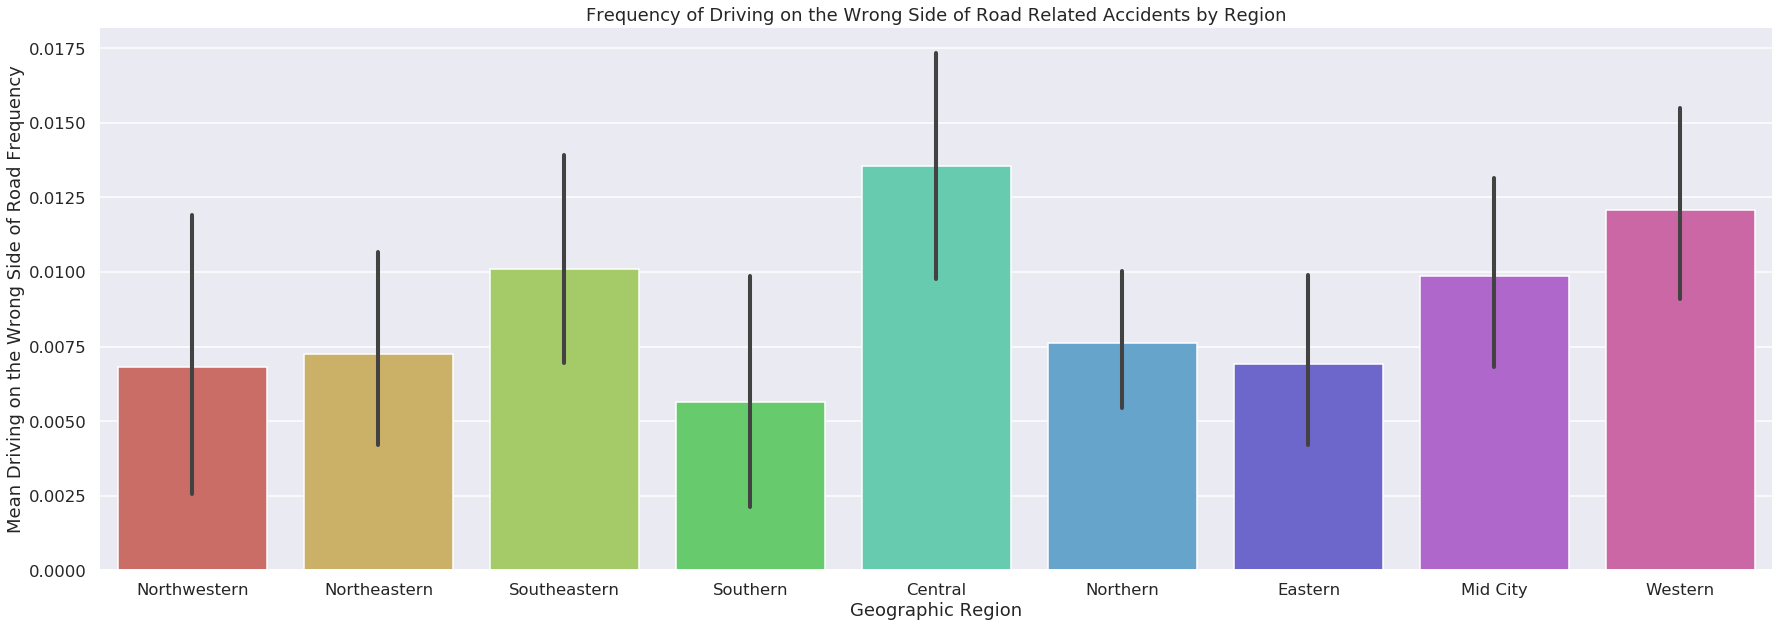

In [65]:
plt.figure(figsize=(30,10))

sns.barplot(x='Geographic_region',y='wrong_side',data=df_collisions,palette="hls",order=['Northwestern','Northeastern','Southeastern',
                                                                                       'Southern','Central','Northern','Eastern','Mid City','Western'])

plt.title('Frequency of Driving on the Wrong Side of Road Related Accidents by Region');
plt.xlabel('Geographic Region');
plt.ylabel('Mean Driving on the Wrong Side of Road Frequency');

This bar chart displays the mean number of driving on the wrong side of the road-related accidents by geographic region of San Diego county. It appears that the Central region has the highest number of driving on the wrong side of the road-related accidents, while the Southern region has the least number of driving on the wrong side of the road-related accidents.

## 4. Frequency of Collisions by Day of the Week

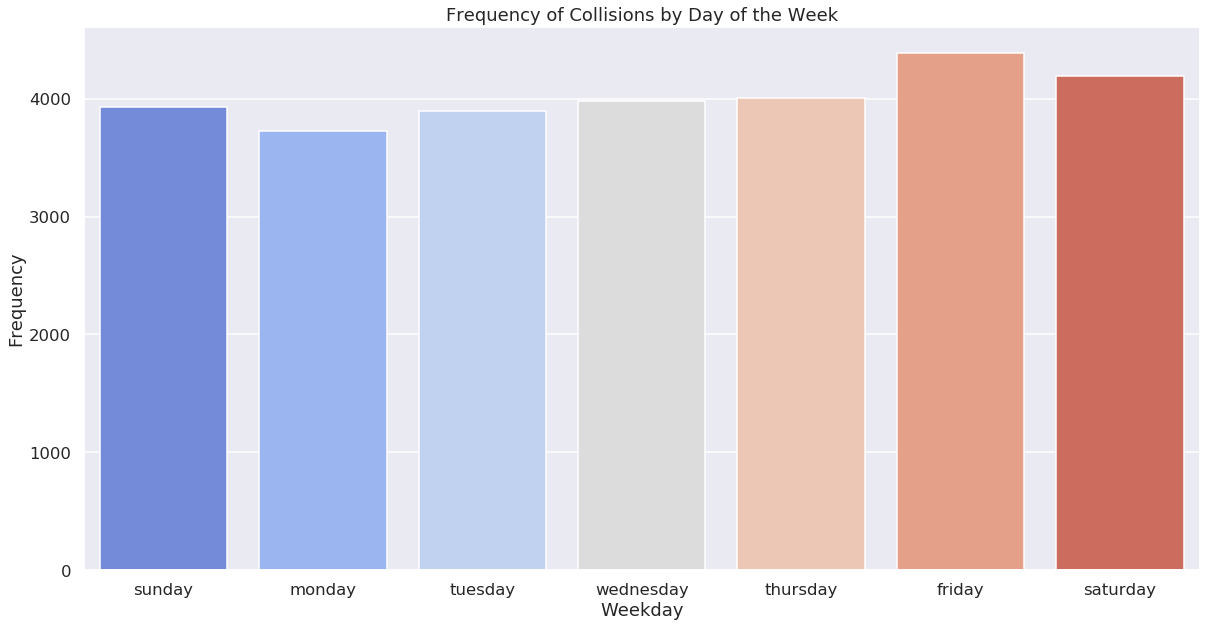

In [66]:
plt.figure(figsize=(20,10))
sns.countplot(x='day', data=df_collisions,palette='coolwarm');

plt.title('Frequency of Collisions by Day of the Week');
plt.xlabel('Weekday');
plt.ylabel('Frequency');

This count plot displays the frequency of total collisions by the day of the week. It appears that the greatest number of collisions occur on Fridays and the least on Mondays. However, in general, there does not seem to be a large difference in the number of total collisions by day of the week. 

## 5. Frequency of Collisions by Weekday

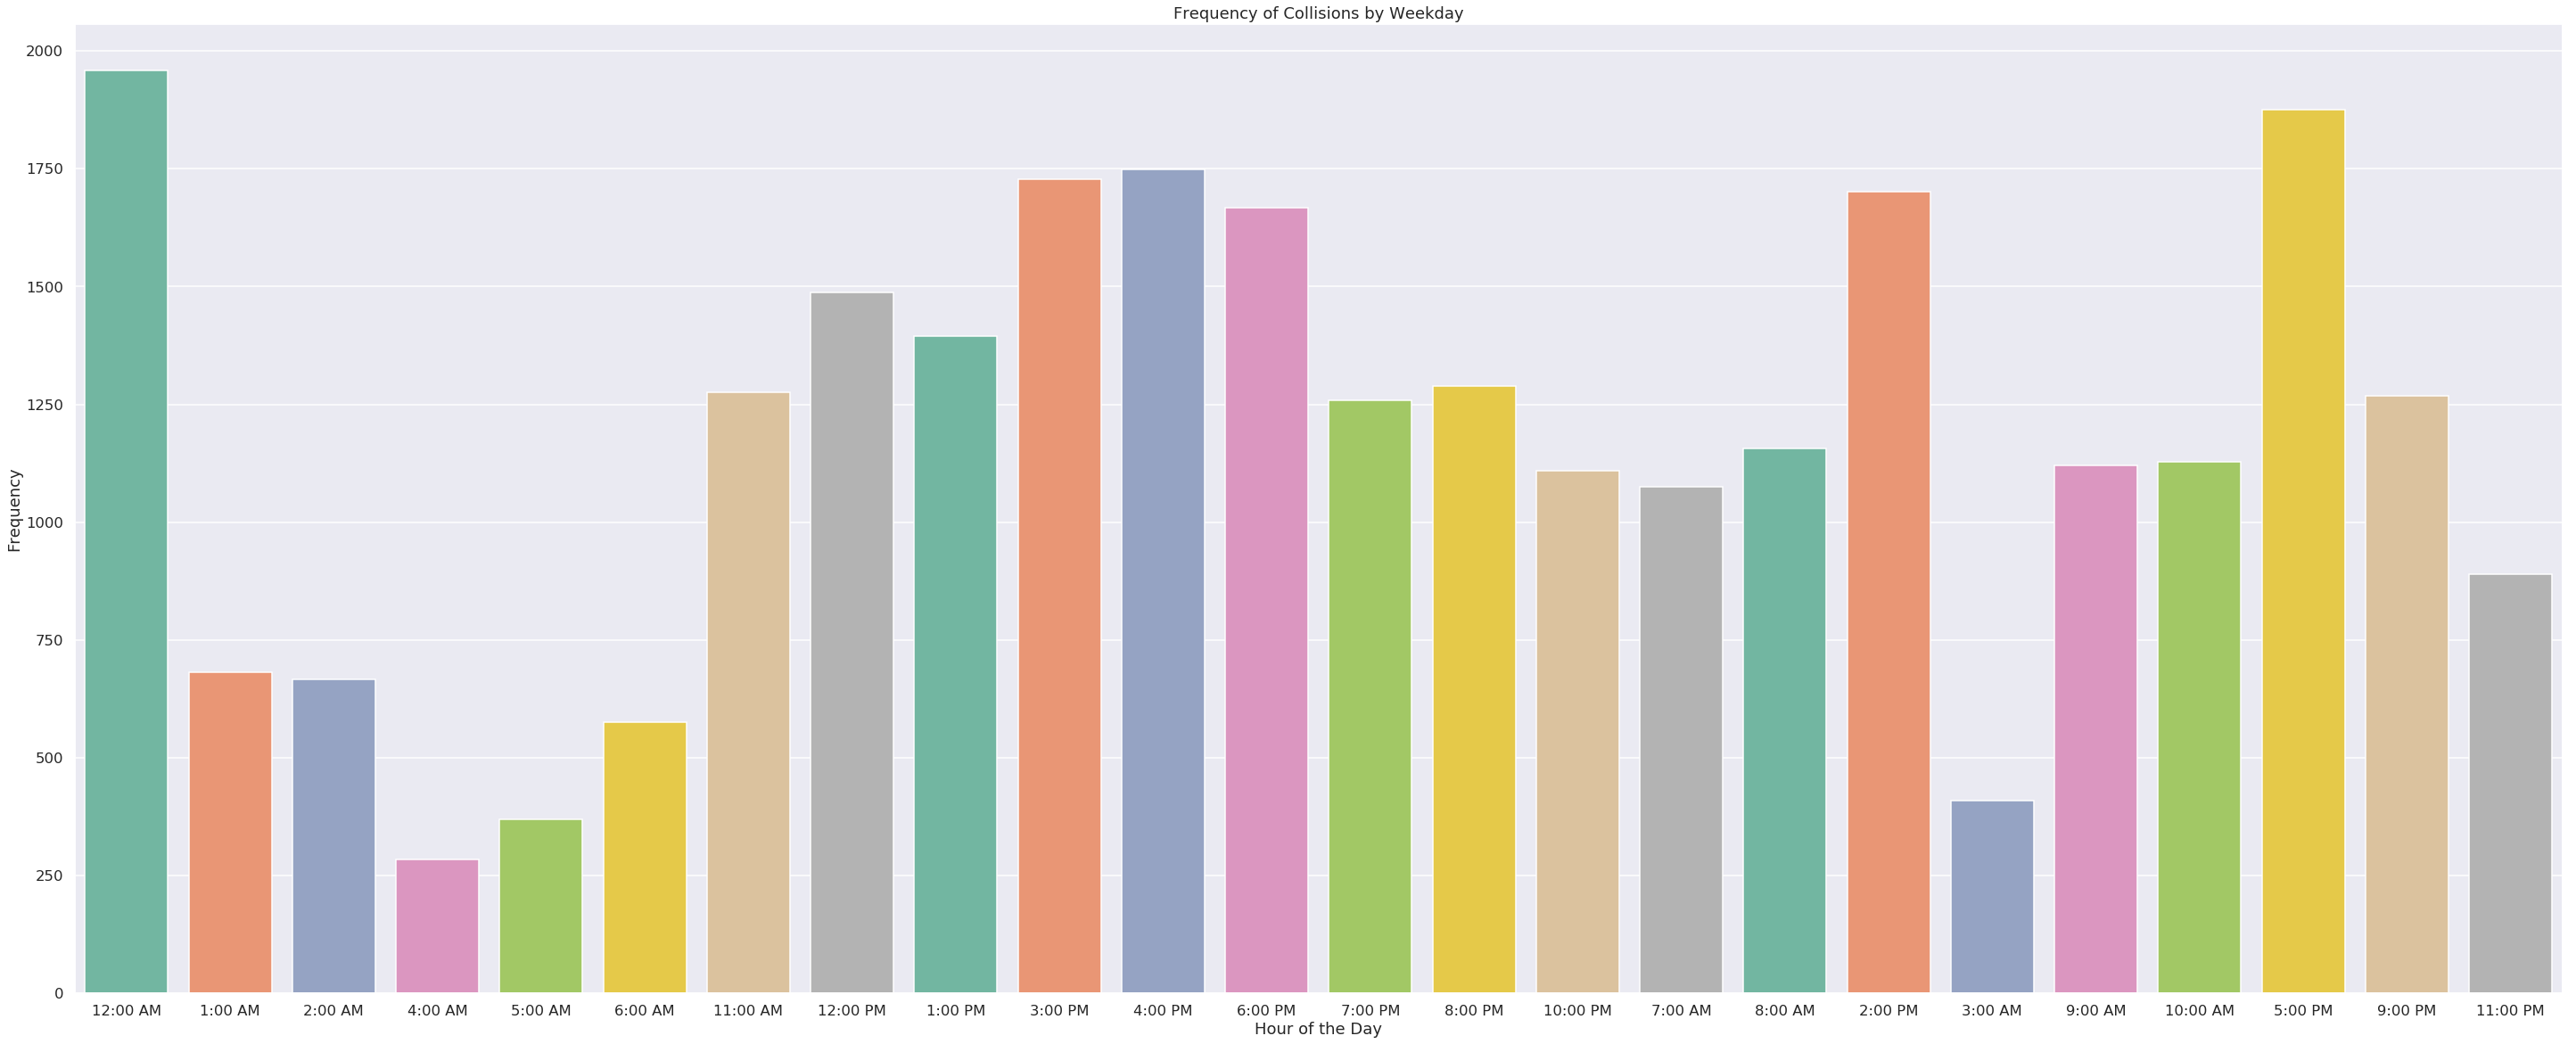

In [67]:
plt.figure(figsize=(50,20))
sns.countplot(x='time', data=df_collisions,palette='Set2');

plt.title('Frequency of Collisions by Weekday');
plt.xlabel('Hour of the Day');
plt.ylabel('Frequency');

This count plot displays the frequency of collisions by the time of day. It appears that the most collisions occur within the 12:00 AM hour, and the least number of collisions occur within the 4:00 AM hour. The graph displays interesting fluctuations and rapid rises and drops in collisions. For example, between the hours of 12:00 AM and 1:00 AM, there is a rapid drop in the number of collisions.

## 6. Police Beats with the Highest Number of Collisions

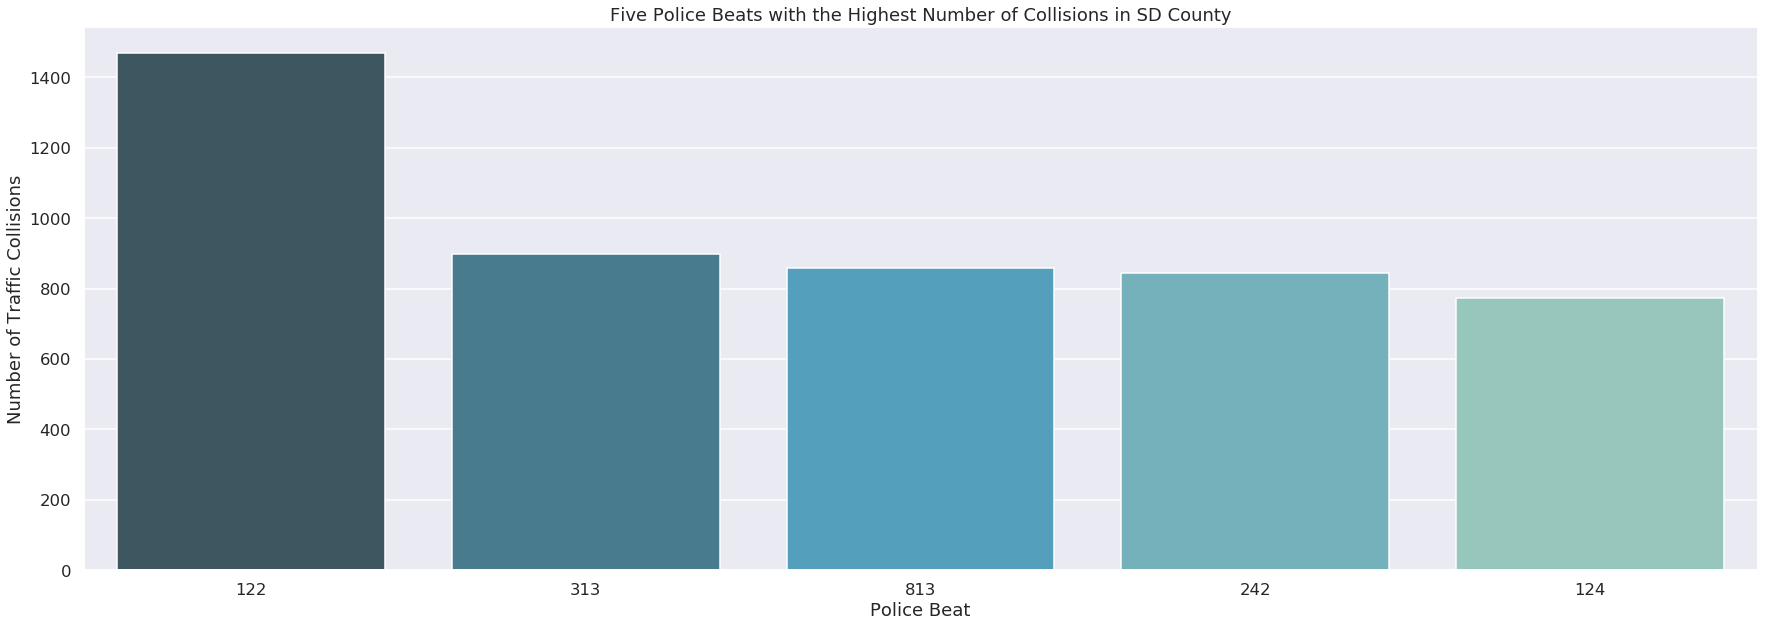

In [68]:
plt.figure(figsize=(30,10))

sns.countplot(x='police_beat',data=df_collisions,order=df_collisions['police_beat'].value_counts().index[0:5],palette="GnBu_d");

plt.title('Five Police Beats with the Highest Number of Collisions in SD County');
plt.xlabel('Police Beat');
plt.ylabel('Number of Traffic Collisions');

**Key**

**beat 122 = Pacific Beach**

**beat 313 = Kearny Mesa**

**beat 813 = North Park**

**beat 242 = Mira Mesa**

**beat 124 = La Jolla**

This count plot displays the five police beats with the highest number of collisions: Pacific Beach, Kearny Mesa, North Park, Mira Mesa, and La Jolla, respectively. Pacific Beach has the highest number of collisions among all 140 police beats in San Diego county.

## 7. Average Number of People Injured in Traffic Collisions by Region

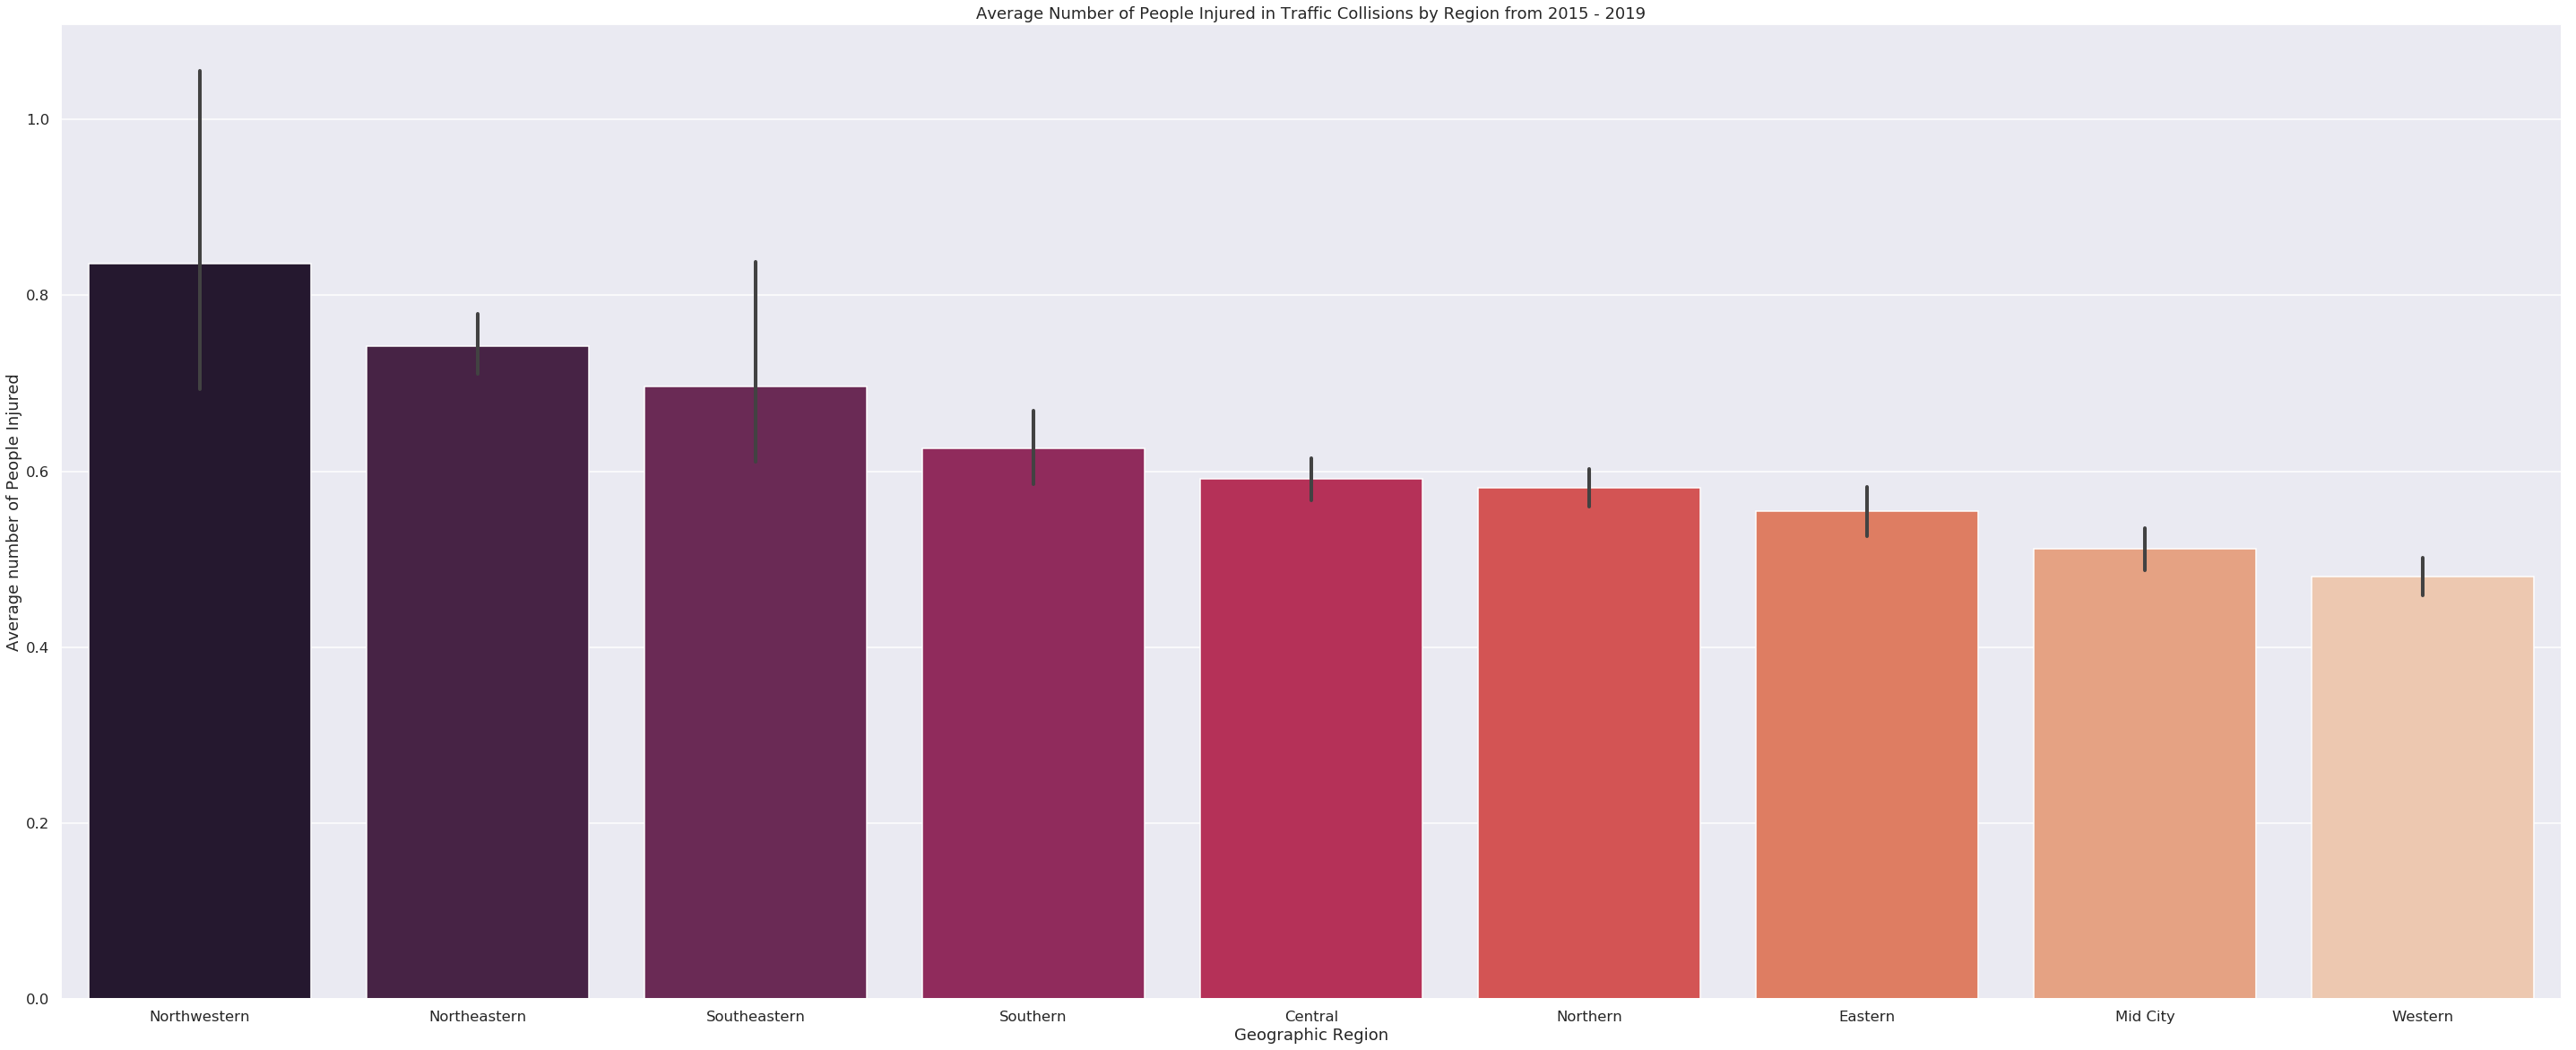

In [69]:
plt.figure(figsize=(50,20))

sns.barplot(x='Geographic_region',y='injured',data=df_collisions,palette="rocket",order=['Northwestern','Northeastern','Southeastern',
                                                                                       'Southern','Central','Northern','Eastern','Mid City','Western'])

plt.title('Average Number of People Injured in Traffic Collisions by Region from 2015 - 2019');
plt.xlabel('Geographic Region');
plt.ylabel('Average number of People Injured');

This barplot displays the average number of people injured in traffic collisions by region. The Northwestern region has the highest number of injuries, while the Western region has the lowest number of injuries.

## 7. Average Number of People Injured in Traffic Collisions by Region

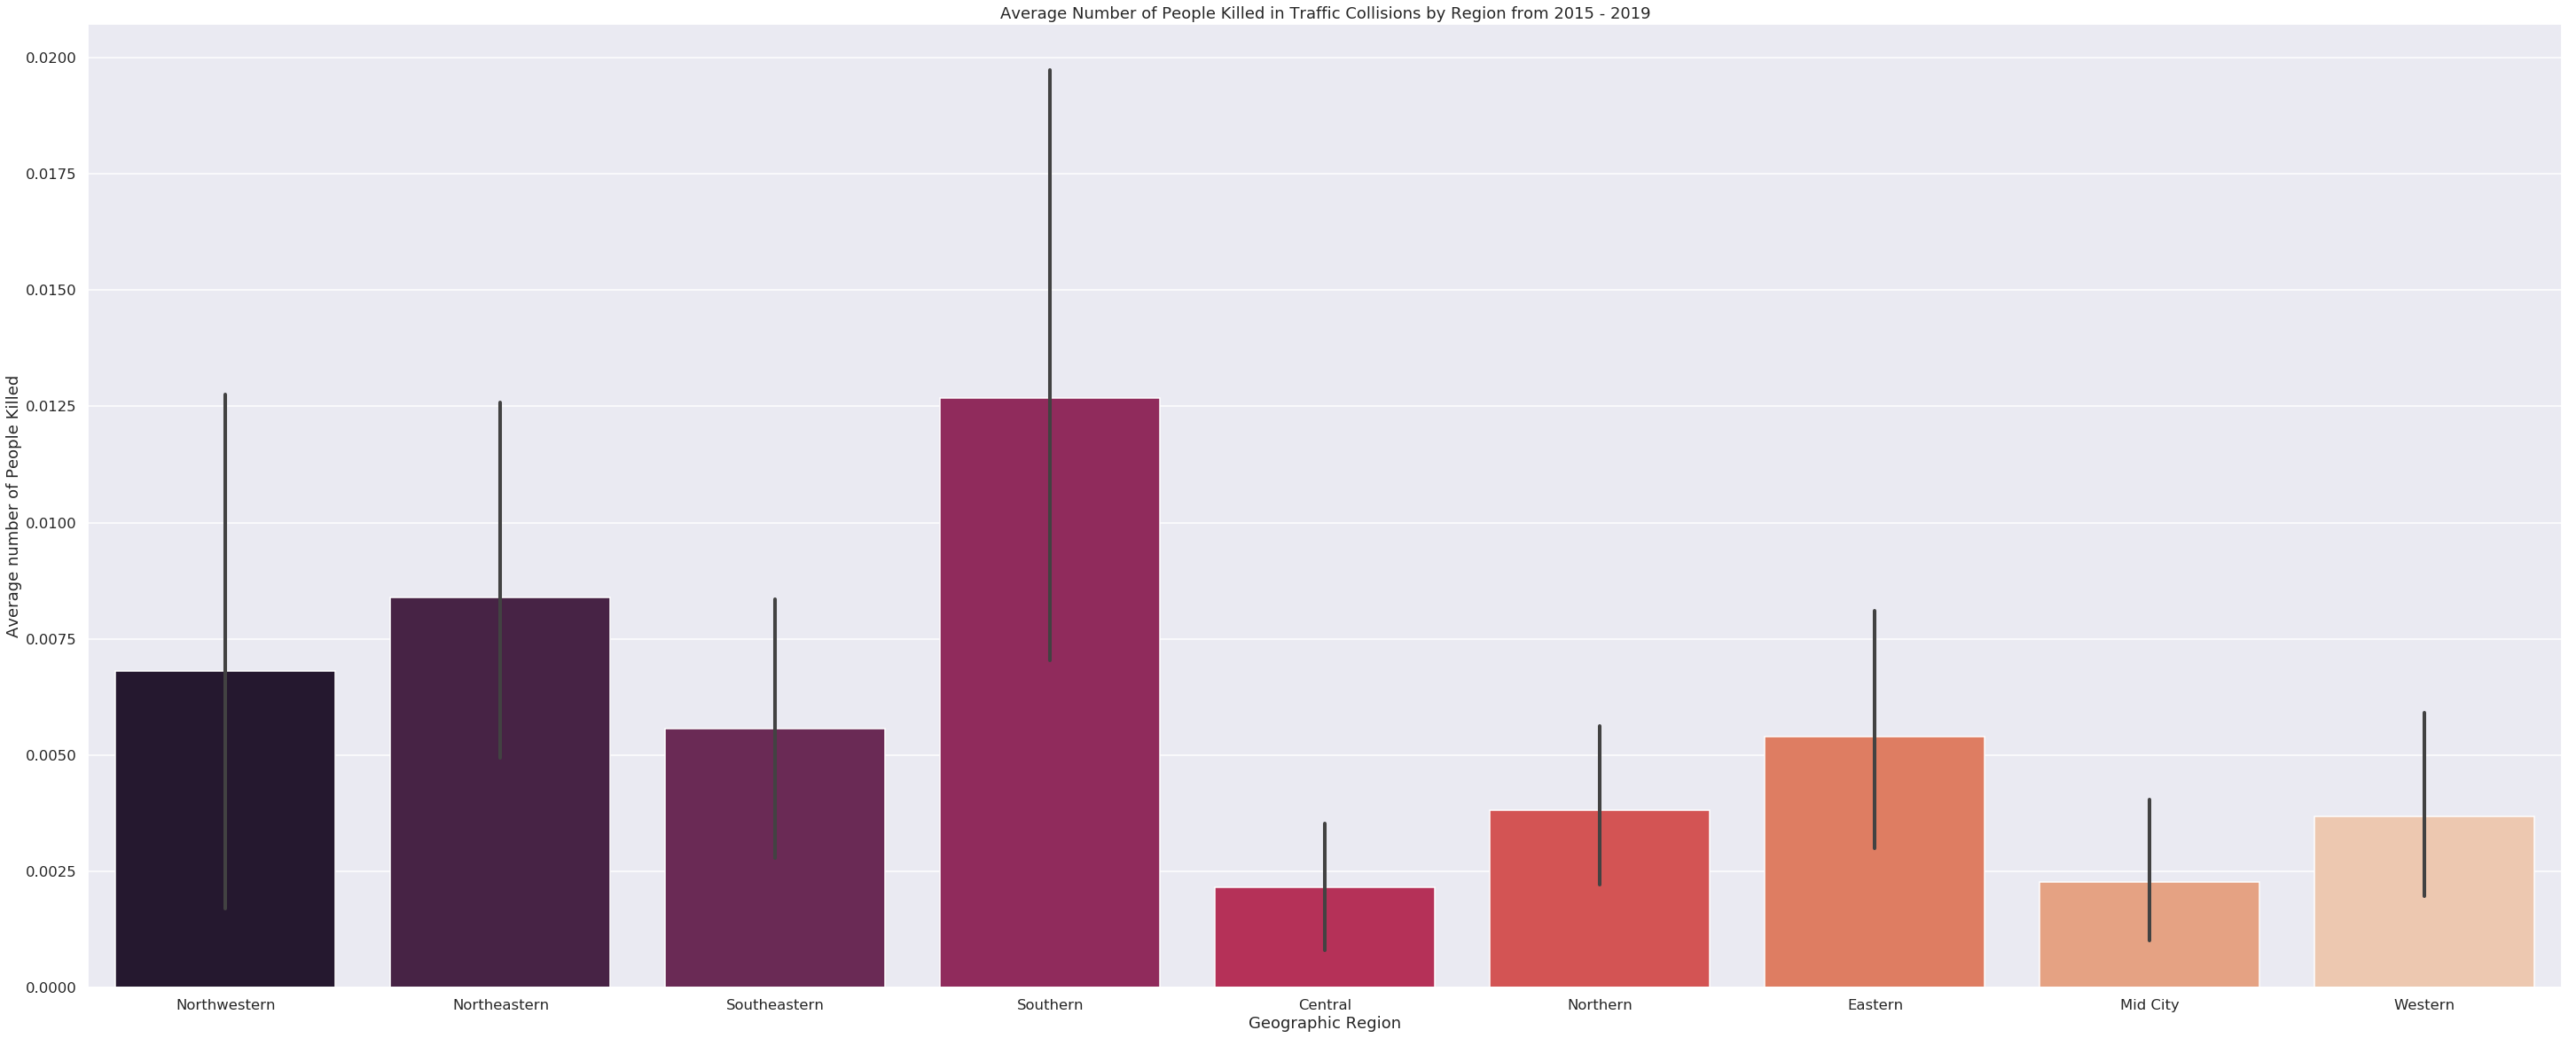

In [70]:
plt.figure(figsize=(50,20))

sns.barplot(x='Geographic_region',y='killed',data=df_collisions,palette="rocket",order=['Northwestern','Northeastern','Southeastern',
                                                                                       'Southern','Central','Northern','Eastern','Mid City','Western'])

plt.title('Average Number of People Killed in Traffic Collisions by Region from 2015 - 2019');
plt.xlabel('Geographic Region');
plt.ylabel('Average number of People Killed');

This barplot displays the average number of people killed in traffic collisions by region. The Southern region has the highest number of fatalities, while the Mid City region has the lowest number of fatalities.

## 8. Police Stop Duration by Age of Driver

<Figure size 3600x1440 with 0 Axes>

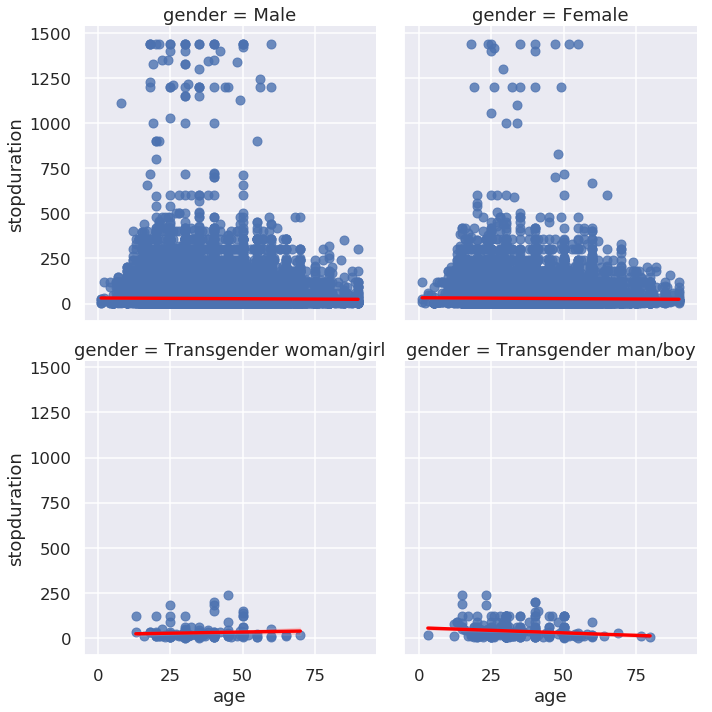

In [71]:
plt.figure(figsize=(50,20))
sns.lmplot(x='age',y='stopduration',
           col='gender',col_wrap=2,data=df_police_stops,truncate=True,line_kws={'color': 'red'})

# plt.title('Police Stop Duration by Age and Gender');

These scatterplots demonstrate how police stop duration is correlated to age by gender. There does not appear to be a strong correlation between age and stop duration across the four reported genders. However, any relationship that does exist between age and stop duration appears to be negative such that stop duration decreases as age increases.

## 9. Vehicle Collision Density in Relation to Bar and Club Location

Vehicle collision heatmap by density of collisions

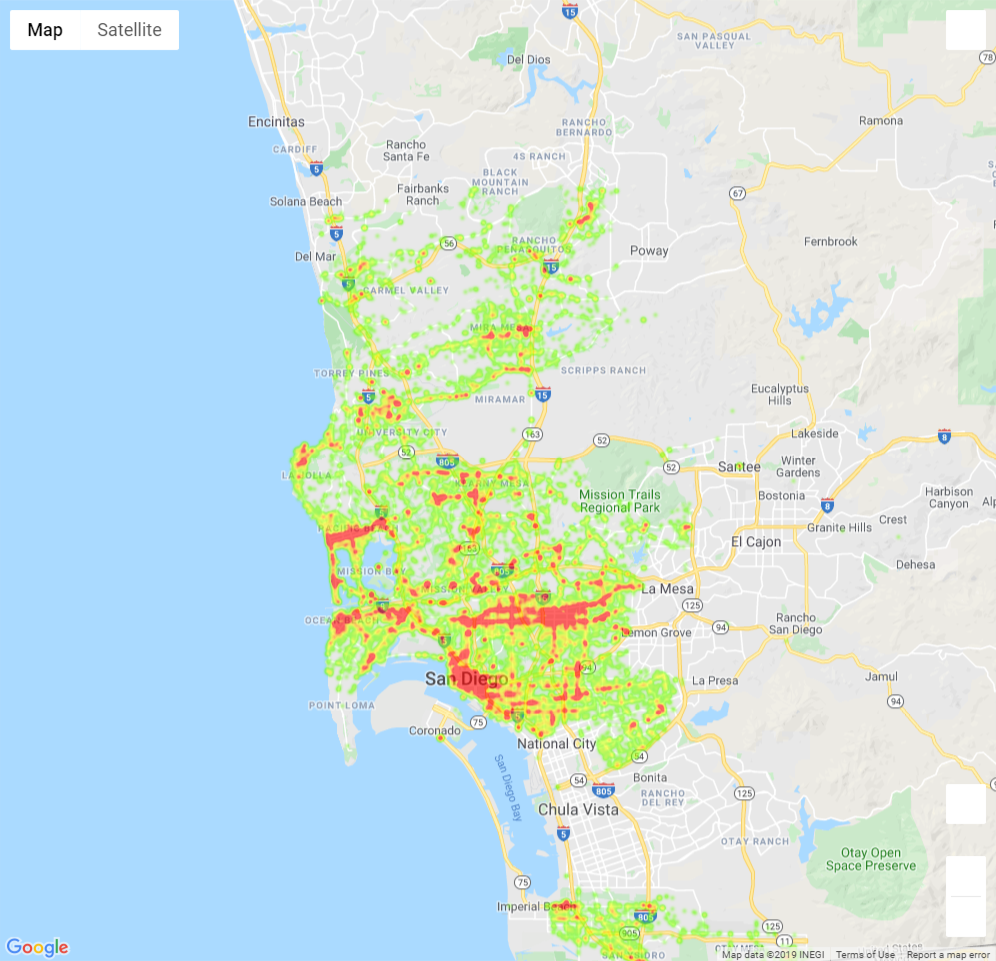

In [72]:
# The code for this entire visualization section is commented out as it can only be run on the API key owner's local desktop 
# fig = gmaps.figure(center=(32.83, -117.14), zoom_level=11, layout=figure_layout)
# heat_map = gmaps.heatmap_layer(df_in_sd[['latitude', 'longitude']])
# heat_map.max_intensity = 15
# heat_map.point_radius = 5
# fig.add_layer(heat_map)
Image('geocoding/heatmap.png')

Vehicle collision heatmap with clubs and bars marked 

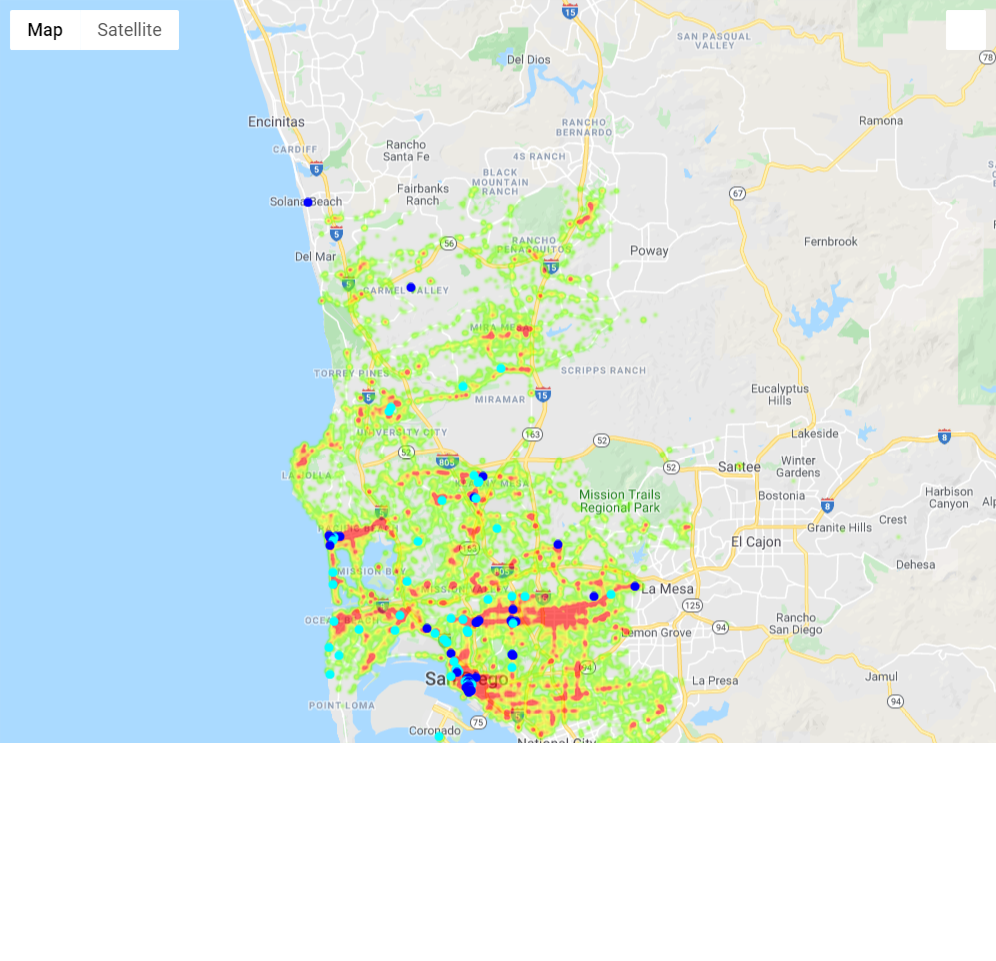

In [73]:
# bars are marked by aqua symbols 
# symbol_bars = gmaps.symbol_layer(yelp_bars[['latitude', 'longitude']], 
#                                  fill_color='aqua', stroke_color='aqua', scale=3)
# fig.add_layer(symbol_bars)

# clubs are marked by blue symbols
# symbol_clubs = gmaps.symbol_layer(yelp_clubs[['latitude', 'longitude']], 
#                                   fill_color='blue', stroke_color='blue', scale=3)
# fig.add_layer(symbol_clubs)
# fig
Image('geocoding/symbol_overlay.png')

# Analyses

**Step 1**: Get a summary of types of traffic collisions 
The code below prints the number of various traffic related collisions including violating traffic signs and signals, violating the right of way, speeding, tailgating, overtaking and passing, hit and runs, DUIs, violating traffic laws, driving on the wrong side of the road, driving without a liscence, evading police, and reckless driving. 

In [74]:
df_northwestern = df_collisions.loc[df_collisions['Geographic_region']=='Northwestern']
counts_northwestern = df_northwestern['violation_section'].value_counts()

df_eastern = df_collisions.loc[df_collisions['Geographic_region']=='Eastern']
counts_eastern = df_eastern['violation_section'].value_counts()

df_central = df_collisions.loc[df_collisions['Geographic_region']=='Central']
counts_central = df_central['violation_section'].value_counts()

df_southeastern = df_collisions.loc[df_collisions['Geographic_region']=='Southeastern']
counts_southeastern = df_southeastern['violation_section'].value_counts()

df_mid_city = df_collisions.loc[df_collisions['Geographic_region']=='Mid City']
counts__mid_city = df_mid_city['violation_section'].value_counts()

df_western = df_collisions.loc[df_collisions['Geographic_region']=='Western']
counts_western = df_western['violation_section'].value_counts()

df_southern = df_collisions.loc[df_collisions['Geographic_region']=='Southern']
counts_southern = df_southern['violation_section'].value_counts()

df_northern = df_collisions.loc[df_collisions['Geographic_region']=='Northern']
counts_northern = df_northern['violation_section'].value_counts()

df_northeastern = df_collisions.loc[df_collisions['Geographic_region']=='Northeastern']
counts_northeastern = df_northeastern['violation_section'].value_counts()

In [75]:
print('Northwestern San Diego Violation Counts:\n'+ str(counts_northwestern))

print('\nEastern San Diego Violation Counts:\n'+ str(counts_eastern))

print('\nCentral San Diego Violation Counts:\n'+ str(counts_eastern))

print('\nSoutheastern San Diego Violation Counts:\n'+ str(counts_southeastern))

print('\nMid City San Diego Violation Counts:\n'+ str(counts__mid_city))

print('\nWestern San Diego Violation Counts:\n'+ str(counts_western))

print('\nSouthern San Diego Violation Counts:\n'+ str(counts_southern))

print('\nNorthern San Diego Violation Counts:\n'+ str(counts_northern))

print('\nNortheastern San Diego Violation Counts:\n'+ str(counts_northeastern))

Northwestern San Diego Violation Counts:
violate traffic signals/signs    335
other                            302
right of way                     213
speeding                         194
tailgating                        51
DUI                               25
overtaking and passing            17
violate traffic laws              15
hit and run                       12
wrong side of the road             8
driving without a liscence         3
unsafe vehicle                     1
Name: violation_section, dtype: int64

Eastern San Diego Violation Counts:
other                            1063
violate traffic signals/signs    1021
right of way                      525
speeding                          407
tailgating                        117
overtaking and passing             47
hit and run                        45
DUI                                38
violate traffic laws               33
wrong side of the road             23
driving without a liscence          6
unsafe vehicle        

**Step 2:** Analysis of Variance (ANOVA) Models

Eight ANOVA models are outlined below. 

## 1. DUI Related Accident Prevalence by Geographic Region

In [76]:
results = ols('dui ~ C(Geographic_region)',data=df_collisions).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dui   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     16.46
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.48e-24
Time:                        23:33:01   Log-Likelihood:                -8988.5
No. Observations:               28113   AIC:                         1.799e+04
Df Residuals:                   28104   BIC:                         1.807e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.1136      0.005     20.702      0.000       0.103       0.124
C(Geographic_region)[T.Eastern]          0.0086      0.008      1.075      0.282      -0.007       0.024
C(Geographic_region)[T.Mid City]        -0.0064      0.008     -0.843      0.399      -0.021       0.009
C(Geographic_region)[T.Northeastern]     0.0538      0.009      6.318      0.000       0.037       0.070
C(Geographic_region)[T.Northern]         0.0383      0.007      5.290      0.000       0.024       0.052
C(Geographic_region)[T.Northwestern]     0.0514      0.011      4.608      0.000       0.030       0.073
C(Geographic_region)[T.Southeastern]    -0.0042      0.008     -0.509      0.611      -0.020       0.012
C(Geographic_region)[T.Southern]         0.0344      0.010      3.309      0.001       0.014       0.055
C(Geographic_region)[T.Western]         -0.0074      0.008     -0.983      0.326      -0.022       0.007
==============================================================================
Omnibus:                    11228.539   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33108.262
Skew:                           2.214   Prob(JB):                         0.00
Kurtosis:                       5.943   Cond. No.                         9.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis above illustrates DUI-related collisions that have occurred categorized by the geographic divisions of San Diego. ANOVA F-tests were used to measure the F-statistics value of 16.46. The F-test and F-statistics value were necessary to our analysis because it determines the relative variance between the geographic regions by finding the ratio of between-group variability and within-group variability. High F-values represents that there’s high variability between the group means. Southern, Northeastern, Northern, and Northwestern regions had a p-value of 0.001, 0.0, 0.0, and 0.0, respectively. All other regions of San Diego obtained a p-value above 0.05, indicating that the null hypothesis cannot be rejected. 

## 2. Speeding Related Accident prevalence by Geographic Region

In [77]:
results = ols('speeding ~ C(Geographic_region)',data=df_collisions).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               speeding   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.688
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00593
Time:                        23:33:01   Log-Likelihood:                 20201.
No. Observations:               28113   AIC:                        -4.038e+04
Df Residuals:                   28104   BIC:                        -4.031e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0149      0.002      7.675      0.000       0.011       0.019
C(Geographic_region)[T.Eastern]         -0.0035      0.003     -1.243      0.214      -0.009       0.002
C(Geographic_region)[T.Mid City]        -0.0028      0.003     -1.029      0.303      -0.008       0.003
C(Geographic_region)[T.Northeastern]     0.0045      0.003      1.504      0.133      -0.001       0.010
C(Geographic_region)[T.Northern]         0.0022      0.003      0.845      0.398      -0.003       0.007
C(Geographic_region)[T.Northwestern]     0.0064      0.004      1.608      0.108      -0.001       0.014
C(Geographic_region)[T.Southeastern]    -0.0048      0.003     -1.638      0.101      -0.011       0.001
C(Geographic_region)[T.Southern]        -0.0050      0.004     -1.368      0.171      -0.012       0.002
C(Geographic_region)[T.Western]         -0.0021      0.003     -0.784      0.433      -0.007       0.003
==============================================================================
Omnibus:                    38239.756   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5377563.072
Skew:                           8.226   Prob(JB):                         0.00
Kurtosis:                      68.728   Cond. No.                         9.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis above illustrates speeding-related collisions that have occurred, categorized by the geographic divisions of San Diego. ANOVA F-tests were used to measure the F-statistics value of 2.688. This value was also lower than the value for DUI-related collisions. One possible explanation for this difference can be due to the prevalence of speeding throughout all regions of San Diego. Speeding-related collisions are most likely not localized to specific regions of San Diego, but rather occur sporadically. None of the regions obtained a p-value above 0.05, indicating that the null hypothesis cannot be rejected. 

## 3. Hit and Run Related Accident prevalence by Geographic Region

In [78]:
results = ols('hit_run ~ C(Geographic_region)',data=df_collisions).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                hit_run   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.529
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00950
Time:                        23:33:02   Log-Likelihood:                 23324.
No. Observations:               28113   AIC:                        -4.663e+04
Df Residuals:                   28104   BIC:                        -4.655e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0117      0.002      6.705      0.000       0.008       0.015
C(Geographic_region)[T.Eastern]          0.0018      0.003      0.733      0.464      -0.003       0.007
C(Geographic_region)[T.Mid City]        -0.0026      0.002     -1.059      0.290      -0.007       0.002
C(Geographic_region)[T.Northeastern]    -0.0002      0.003     -0.082      0.935      -0.006       0.005
C(Geographic_region)[T.Northern]        -0.0026      0.002     -1.140      0.254      -0.007       0.002
C(Geographic_region)[T.Northwestern]    -0.0014      0.004     -0.410      0.682      -0.008       0.005
C(Geographic_region)[T.Southeastern]    -0.0033      0.003     -1.255      0.210      -0.008       0.002
C(Geographic_region)[T.Southern]        -0.0025      0.003     -0.756      0.450      -0.009       0.004
C(Geographic_region)[T.Western]          0.0053      0.002      2.222      0.026       0.001       0.010
==============================================================================
Omnibus:                    41041.506   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8582719.732
Skew:                           9.247   Prob(JB):                         0.00
Kurtosis:                      86.576   Cond. No.                         9.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis above illustrates hit-and-run collisions that have occurred categorized by the geographic divisions of San Diego. ANOVA F-tests were used to measure the F-statistics value of 2.529. This F-statistics value was lower than the value for DUI-related collisions. One possible explanations for a lower F-statistics value could be due to the lower number of hit-and-run incidents. The Western region of San Diego had a p-value of 0.026. All other regions of San Diego obtained a p-value above 0.05, indicating that the null hypothesis cannot be rejected. 

## 4. Driving on the Wrong Side of the Road Related Accident Prevalence by Geographic Region

In [79]:
results = ols('wrong_side~ C(Geographic_region)',data=df_collisions).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             wrong_side   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.309
Date:                Thu, 12 Dec 2019   Prob (F-statistic):             0.0180
Time:                        23:33:02   Log-Likelihood:                 25920.
No. Observations:               28113   AIC:                        -5.182e+04
Df Residuals:                   28104   BIC:                        -5.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0136      0.002      8.552      0.000       0.010       0.017
C(Geographic_region)[T.Eastern]         -0.0066      0.002     -2.891      0.004      -0.011      -0.002
C(Geographic_region)[T.Mid City]        -0.0037      0.002     -1.678      0.093      -0.008       0.001
C(Geographic_region)[T.Northeastern]    -0.0063      0.002     -2.567      0.010      -0.011      -0.001
C(Geographic_region)[T.Northern]        -0.0059      0.002     -2.831      0.005      -0.010      -0.002
C(Geographic_region)[T.Northwestern]    -0.0067      0.003     -2.093      0.036      -0.013      -0.000
C(Geographic_region)[T.Southeastern]    -0.0035      0.002     -1.442      0.149      -0.008       0.001
C(Geographic_region)[T.Southern]        -0.0079      0.003     -2.632      0.009      -0.014      -0.002
C(Geographic_region)[T.Western]         -0.0015      0.002     -0.679      0.497      -0.006       0.003
==============================================================================
Omnibus:                    43393.449   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         12617791.671
Skew:                          10.183   Prob(JB):                         0.00
Kurtosis:                     104.769   Cond. No.                         9.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis above illustrates collisions that have occurred due to a driver driving on the wrong side of the road. These incidents were categorized by the geographic divisions of San Diego. ANOVA F-tests were used to measure the F-statistics value of 2.309. Since the number of collisions caused by driving on the wrong side of the road were not very high, the sample size of our statistical analysis is very limited. Eastern, Northeastern, Northern, Northwestern, and Southern regions had a p-value of 0.04, 0.01, 0.005, 0.036, and 0.009.  All other regions obtained a p-value above 0.05, indicating that the null hypothesis cannot be rejected. 

## 5. Injuries by Geographic Region

In [80]:
results = ols('injured ~ C(Geographic_region)',data=df_collisions).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                injured   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     13.19
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           3.51e-19
Time:                        23:33:02   Log-Likelihood:                -51619.
No. Observations:               28113   AIC:                         1.033e+05
Df Residuals:                   28104   BIC:                         1.033e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.5916      0.025     23.675      0.000       0.543       0.641
C(Geographic_region)[T.Eastern]         -0.0365      0.036     -1.007      0.314      -0.108       0.035
C(Geographic_region)[T.Mid City]        -0.0792      0.035     -2.281      0.023      -0.147      -0.011
C(Geographic_region)[T.Northeastern]     0.1508      0.039      3.890      0.000       0.075       0.227
C(Geographic_region)[T.Northern]        -0.0104      0.033     -0.314      0.753      -0.075       0.054
C(Geographic_region)[T.Northwestern]     0.2443      0.051      4.806      0.000       0.145       0.344
C(Geographic_region)[T.Southeastern]     0.1051      0.038      2.783      0.005       0.031       0.179
C(Geographic_region)[T.Southern]         0.0342      0.047      0.721      0.471      -0.059       0.127
C(Geographic_region)[T.Western]         -0.1113      0.035     -3.224      0.001      -0.179      -0.044
==============================================================================
Omnibus:                   102680.661   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      82142205521.102
Skew:                          77.018   Prob(JB):                         0.00
Kurtosis:                    8375.627   Cond. No.                         9.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis above illustrates collisions that have resulted in injury across the nine geographic regions of San Diego county. ANOVA F-tests were used to measure the F-statistic of 13.19 and p-value of <0.001, which suggests that there is a significant difference in the number of injuries across the collisions of the nine geographic regions. Mid City (p=0,023), Northeastern (p<0.0001), Northwestern (p<0.0001),Southeastern (p=0.005),Western (p=0.001) carried a p-value under 0.05. The rest of the regions failed to carry a p-value below 0.05. Therefore, we fail to reject the null hypothesis, accepting we cannot conclude any relation between these regions and fatalities in accidents.

## 6. Fatalities by Geographic Region

In [81]:
results2 = ols('killed ~ C(Geographic_region)',data=df_collisions).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 killed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.630
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.14e-05
Time:                        23:33:02   Log-Likelihood:                 34228.
No. Observations:               28113   AIC:                        -6.844e+04
Df Residuals:                   28104   BIC:                        -6.836e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                0.0022      0.001      1.839      0.066      -0.000       0.004
C(Geographic_region)[T.Eastern]          0.0032      0.002      1.889      0.059      -0.000       0.007
C(Geographic_region)[T.Mid City]         0.0001      0.002      0.065      0.949      -0.003       0.003
C(Geographic_region)[T.Northeastern]     0.0062      0.002      3.399      0.001       0.003       0.010
C(Geographic_region)[T.Northern]         0.0016      0.002      1.059      0.290      -0.001       0.005
C(Geographic_region)[T.Northwestern]     0.0046      0.002      1.932      0.053   -6.65e-05       0.009
C(Geographic_region)[T.Southeastern]     0.0034      0.002      1.909      0.056   -9.04e-05       0.007
C(Geographic_region)[T.Southern]         0.0105      0.002      4.701      0.000       0.006       0.015
C(Geographic_region)[T.Western]          0.0015      0.002      0.936      0.349      -0.002       0.005
==============================================================================
Omnibus:                    56367.684   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        131101703.156
Skew:                          16.683   Prob(JB):                         0.00
Kurtosis:                     335.878   Cond. No.                         9.41
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The analysis above illustrates the relationship between fatalities and the nine geographic regions of San Diego. ANOVA F-tests were used to measure the F-statistic of 4.630. The regions of Eastern and Southern were the only regions to carry a p-value under 0.001, with 0.001 and 0.000, respectively. This suggests that in these two locations, we reject the null hypothesis and see an established correlation between fatalities and that region. The rest of the regions failed to carry a p-value below 0.05. Therefore, we fail to reject the null hypothesis, accepting we cannot conclude any relation between these regions and fatalities in accidents. 

## 7. Injuries by Day of the Week

In [82]:
results3 = ols('injured ~ C(day)',data=df_collisions).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                injured   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.337
Date:                Thu, 12 Dec 2019   Prob (F-statistic):            0.00275
Time:                        23:33:02   Log-Likelihood:                -51674.
No. Observations:               28122   AIC:                         1.034e+05
Df Residuals:                   28115   BIC:                         1.034e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6532      0.023     28.475      0.000       0.608       0.698
C(day)[T.monday]       -0.0830      0.034     -2.452      0.014      -0.149      -0.017
C(day)[T.saturday]     -0.1214      0.033     -3.699      0.000      -0.186      -0.057
C(day)[T.sunday]       -0.0966      0.033     -2.893      0.004      -0.162      -0.031
C(day)[T.thursday]     -0.0515      0.033     -1.551      0.121      -0.117       0.014
C(day)[T.tuesday]      -0.0263      0.033     -0.787      0.431      -0.092       0.039
C(day)[T.wednesday]    -0.0336      0.033     -1.009      0.313      -0.099       0.032
==============================================================================
Omnibus:                   102626.117   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      81540136207.682
Skew:                          76.818   Prob(JB):                         0.00
Kurtosis:                    8343.548   Cond. No.                         7.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The statistical analysis above illustrates the relationship between collision-related injuries and the day of the week. ANOVA F-tests were used to measure the F-statistics value of 3.337. F-values closer to 1 support the null hypothesis; therefore, the F-value for this ANOVA analysis rejects the null hypothesis. Monday, Saturday, and Sunday obtained a p-value of 0.014, 0.000, and 0.004, respectively. These days of the week are the days with the highest nightlife activity and exhaustion. Since the p-value for these days was lower than 0.05, the null hypothesis can be rejected for these days of the week. Other days of the week had a p-value calculated above 0.05; therefore, we fail to reject the null hypothesis for these days of the week. 

# 8. Injuries by Time of Day

In [83]:
results3 = ols('injured ~ C(time)',data=df_collisions).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                injured   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     12.45
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           4.91e-47
Time:                        23:33:03   Log-Likelihood:                -51542.
No. Observations:               28122   AIC:                         1.031e+05
Df Residuals:                   28098   BIC:                         1.033e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.6020      0.045     13.360      0.000       0.514       0.690
C(time)[T.10:00 PM]    -0.1137      0.064     -1.777      0.076      -0.239       0.012
C(time)[T.11:00 AM]     0.0391      0.062      0.632      0.527      -0.082       0.160
C(time)[T.11:00 PM]    -0.1334      0.068     -1.966      0.049      -0.266      -0.000
C(time)[T.12:00 AM]    -0.4218      0.057     -7.457      0.000      -0.533      -0.311
C(time)[T.12:00 PM]     0.0230      0.060      0.386      0.700      -0.094       0.140
C(time)[T.1:00 AM]     -0.2304      0.073     -3.138      0.002      -0.374      -0.087
C(time)[T.1:00 PM]      0.0977      0.061      1.612      0.107      -0.021       0.216
C(time)[T.2:00 AM]     -0.2611      0.074     -3.531      0.000      -0.406      -0.116
C(time)[T.2:00 PM]      0.1454      0.058      2.503      0.012       0.032       0.259
C(time)[T.3:00 AM]     -0.2988      0.087     -3.421      0.001      -0.470      -0.128
C(time)[T.3:00 PM]      0.1051      0.058      1.813      0.070      -0.008       0.219
C(time)[T.4:00 AM]     -0.2335      0.100     -2.328      0.020      -0.430      -0.037
C(time)[T.4:00 PM]      0.0474      0.058      0.820      0.413      -0.066       0.161
C(time)[T.5:00 AM]     -0.0979      0.091     -1.079      0.281      -0.276       0.080
C(time)[T.5:00 PM]      0.1022      0.057      1.793      0.073      -0.010       0.214
C(time)[T.6:00 AM]      0.0711      0.078      0.917      0.359      -0.081       0.223
C(time)[T.6:00 PM]      0.0623      0.058      1.068      0.285      -0.052       0.177
C(time)[T.7:00 AM]      0.1146      0.064      1.777      0.076      -0.012       0.241
C(time)[T.7:00 PM]      0.0176      0.062      0.284      0.777      -0.104       0.139
C(time)[T.8:00 AM]      0.0797      0.063      1.259      0.208      -0.044       0.204
C(time)[T.8:00 PM]      0.0994      0.062      1.611      0.107      -0.022       0.220
C(time)[T.9:00 AM]      0.0323      0.064      0.506      0.613      -0.093       0.157
C(time)[T.9:00 PM]     -0.0346      0.062     -0.558      0.577      -0.156       0.087
==============================================================================
Omnibus:                   103051.460   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      84407031273.872
Skew:                          77.794   Prob(JB):                         0.00
Kurtosis:                    8488.918   Cond. No.                         25.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The statistical analysis above illustrates the ANOVA t-test statistics results for the relationship between collision-related injuries and time of day. Time of day was categorized by the hour of the day. 10PM, 11PM, 12AM, 1AM, 2AM, 3AM, 4AM, 5PM, 2PM, and 7AM obtained calculated p-values of 0.076, 0.049, 0.000, 0.002, 0.000, 0.001, 0.020, 0.073, 0.012, and 0.076, respectively. 10PM - 4AM largely represents prime nightlife activity hours. 7AM and 5PM are also times of high traffic because people are trying to get to work and home during those specific hours in the day. Since the p-value for these times of the day is below 0.05, the null hypothesis can be rejected. All other times of the day obtained a p-value above 0.05, indicating that we fail to reject the null hypothesis for these times of the day. Furthermore, ANOVA F-tests were used to measure the F-statistics value of 12.45, indicating that there is high variability between the group means that are being compared. F-values closer to 1 support the null hypothesis; therefore, the F-value for this ANOVA analysis rejects the null hypothesis. 

## 9. Stop Duration by Age

In [84]:
df_police_stops.corr()

,stopduration,beat,age
stopduration,1.00,0.02,-0.02
beat,0.02,1.00,0.02
age,-0.02,0.02,1.00


In [85]:
outcome, predictors = patsy.dmatrices('stopduration ~ age', df_police_stops)

mod = sm.OLS(outcome,predictors)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           stopduration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     94.63
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           2.32e-22
Time:                        23:33:03   Log-Likelihood:            -9.5938e+05
No. Observations:              179667   AIC:                         1.919e+06
Df Residuals:                  179665   BIC:                         1.919e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.3173      0.350     89.578      0.0

The analysis above illustrates a linear regression model exploring the relationship between police stop duration and age. The linear regression equation obtained through the analysis was: stop_duration = 31.3173 - 0.0862*age. This equation demonstrates that as age increases, stop duration decreases. The data shows that age and stop duration are negatively correlated to one another. These results uphold our hypothesis that younger individuals would be stopped for a longer duration of time by the police. One explanation to why this may occur can be due to the lack of experience younger drivers have. It’s possible that police are more willing to explain the rules and use these stops as a teaching opportunity for younger, unexperienced drivers, resulting in a longer stop duration.

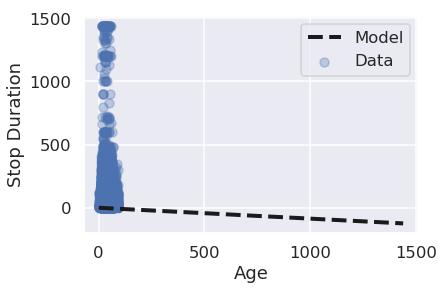

In [86]:
plt.scatter(df_police_stops['age'],df_police_stops['stopduration'],alpha=0.3,label='Data')

xs=np.arange(df_police_stops['age'].min(),df_police_stops['stopduration'].max())

ys = -0.0862* xs
plt.plot(xs,ys,'--k', linewidth=4, label='Model')

plt.xlabel('Age')
plt.ylabel('Stop Duration')
plt.legend();

# Ethics & Privacy

Despite pulling data from publically available datasets, insensitive analyses and false conclusions could affect the beliefs and well-being of San Diego residents. Thus, we have taken precautions to input data that respects the privacy of individuals whose information are in the dataset using the Safe Harbour protocol, as well as carefully considering our conclusions. Specifically, the information of any individual over the age of 90 was removed. Moreover, though we found more collisions in lower-income areas with a higher population of people of color, we took care to mention the crucial factors that likely effect this result such as neglected traffic lights, worn-out cars leading to car malfunctions, and damaged roads. 


# Conclusion & Discussion

Taking into account the different aspects of this question, as well as the results we found, we can conclude that certain aspects of our hypotheses were correct, while others were a bit misguided.
For example, the type of traffic violations that are most common within San Diego county were violating traffic signals and signs. This varies only slightly from our original hypothesis, in that minor collisions are not among the most prevalent, but rather general traffic violations occur at a much higher rate. Still, it is important to note that these seemingly small violations could very easily lead to much larger and more serious collisions and injuries, so it would be wise to figure out why exactly these things are happening to perhaps prevent any major collisions in the future.

Our group was interested in determining whether or not more collisions occur in communities with higher nightlife activity. It was expected that police beats that patrol communities with high nightlife activity, which include Pacific Beach, Hillcrest, Gaslamp Quarters, and North Park, would have higher frequency of collisions. The data shows that Pacific Beach had the highest frequency of collisions with almost 1500 collisions. Kearny Mesa, North Park, Mira Mesa, and La Jolla were the next cities with the highest number of collisions within San Diego county. Although La Jolla does not have high nightlife activity, the high number of collisions can be due to other factors such as age distribution. Since La Jolla is well-known as a city where people come to retire, the population of the city consists of a lot more older individuals. For most driver’s licenses, people are required to renew their license after the age of 65 because driving competency begins to decline at that age. Although the Central Division of San Diego County had the highest nightlife activity, the data did not show the Central Division to be an area with high collision frequency. 
As for the question of which geographic region of San Diego is host to the highest volume of severe accidents (totaled cars, injuries, deaths, etc.), we found that police beat 122, Pacific Beach, had the highest number of traffic collisions, Northwestern San Diego had the highest average amount of injuries, and Southern San Diego had the highest average number of fatalities. Pacific Beach is a San Diego neighborhood well known for its active nightlife, which may be a contributor to the amount of traffic collisions that occur.

Lastly, we investigated whether there were any biases in police in the demographics of the people who were stopped and questioned. We predicted that younger people would get stopped more than people of older age. In our data, we found that younger people were stopped more often with longer duration, which aligned with our hypothesis. Along with reasons stated in our hypothesis, younger people might be getting stopped with longer durations because officers might be taking more time to explain the procedures and traffic laws. 


### Limitations
Some of the limitations we faced were in the datasets we used. One limitation was that we weren’t able to access data for every single bar in San Diego, which affects the visualization of the data and the statistics. The Yelp datasets only gave us the most popular bars that were localized more in downtown San Diego and not getting much from bars more North. This meant we were not getting all of San Diego County. Another limitation in our dataset was that some of the data overlapped in the violations sections, which means some of the data for one violation were duplicated in other violation sections. We also did not consider all violation codes. We also found that the nine regions that we used to split up San Diego County were not truly representative. Each of the nine regions have different cities and each city has a varying density of nightlife activity. Based on each respective region, the data of the cities with different densities were combined into that region. It would have been better to separate regions of San Diego County by police beats for analysis and representation of nightlife activity, but there are 140 police beats. Though it may have been better to separate the regions by the smaller police beat areas, 140 different regions may have over complicated the analysis. 
